# Visualizing Energy Data
----
 The plots here are made using data downloaded from the ENTSO-E API. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, HourLocator

def getCountryList():
    test1 = ["DE","FR","NO"]
    list1 = ["DE","FR", "BE","BG","HR","CZ","EE","FI","GR","HU","IT","LV","LT","LU","ME","NL","NO","PL","PT","SK","CH"]
    actualMissing = ["DK","XK","MK","RO","SI","ES","SE"]
    forecastFound = ["BE","CH","CZ","DE","FI","HU","LT","NL","PL"]
    return forecastFound

def actualCountryList():
    return ["BE","BG","CH","CZ","DE","EE","FI","FR","GR","HR","HU","IT","LT","LU","LV","ME","NL","NO","PL"]

def forecastCountryList():
    return ["BE","BG","CH","CZ","DE","DK","EE","FI","FR","GR","ES","HR","HU","IT","LT","LU","LV","ME","NL","NO","PL","SE","SI"]

def countryName(ky):
    countries = {'AT': 'Austria', 'BE': 'Belgium', 'BG': 'Bulgaria', 'CY': 'Cyprus', 'CZ': 'Czech Republic', 'DE': 'Germany', 'DK': 'Denmark', 'EE': 'Estonia', 'ES': 'Spain', 'FI': 'Finland', 'FR': 'France', 'GR': 'Greece', 'HR': 'Croatia', 'HU': 'Hungary', 'IE': 'Ireland', 'IT': 'Italy', 'LT': 'Lithuania', 'LU': 'Luxembourg', 'LV': 'Latvia', 'MT': 'Malta', 'NL': 'Netherlands', 'PL': 'Poland', 'PT': 'Portugal',  'RO': 'Romania',   'SE': 'Sweden','SI': 'Slovenia', 'SK': 'Slovakia', 'CH': 'Switzerland',"ME":"Montenegro","MK":"North Macedonia","NO":"Norway"}
    return countries[ky]

def getCountryData(code,dataType,startDate,endDate):
    csv_file = './rawData/'+code+'-202001010000-202301010000-'+dataType+'-60.csv'
    start_date = pd.to_datetime(startDate)
    end_date = pd.to_datetime(endDate)
    filtered_data = filter_data_by_date(csv_file, start_date, end_date)
    return filtered_data

# Method to filter hourly data based on start and end dates
def filter_data_by_date(csv_file, start_date, end_date):
    # Load CSV data into a pandas DataFrame
    df = pd.read_csv(csv_file)
    # Convert 'startTime' column to datetime format
    df['startTime'] = pd.to_datetime(df['startTime'], format='%Y%m%d%H%M')
    # Filter data based on start and end dates
    filtered_data = df[(df['startTime'] >= start_date) & (df['startTime'] <= end_date)]
    return filtered_data

# Method to create a line chart from hourly data
def create_line_chart(hourly_data,title,column="percentRenewable"):
    plt.figure(figsize=(15, 5))
    if column in hourly_data.columns:
        data = hourly_data[column]
    else:
        data  =  [0] * len(hourly_data)
    plt.plot(hourly_data['startTime'], data, color='#04316a')
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.title(title)
    # Format x-axis tick labels to show hours
    # hours_locator = HourLocator(interval=1)
    # hours_formatter = DateFormatter('%H:%M')
    # plt.gca().xaxis.set_major_locator(hours_locator)
    # plt.gca().xaxis.set_major_formatter(hours_formatter)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_multiple_line_charts(dataframe, title, column_list):
    """
    Plot multiple line charts based on the specified columns in the given DataFrame.
    
    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    column_list (list): List of column names to plot as line charts.
    """
    plt.figure(figsize=(15, 6))
    for column in column_list:
        if column in dataframe.columns:
            plt.plot(dataframe['startTime'], dataframe[column], label=column)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)
    plt.show()

## Actual generation hourly plots
----

The plots below are based on the actual generation data for multiple countries. Plot types include: 
- Percentage of energy generated using renewable sources
- Total generation of energy from renewable and non renewable sources

The plots below show what percentage of electricity is produced from renewable sources across mulitple countries for the given time period. The percentages are calculated based on actual generation data. 


The time duration can be adjusted in the cell below :

In [27]:
hourly_start_date="2022-05-01"
hourly_end_date="2022-05-05"

In [140]:
def showPercentageRenewable(data,code,start,end):
    create_line_chart(data,'Hourly Percentage of Renewable Energy in '+countryName(code)+' from '+start+' to '+end)

def showEnergyTypePlot(data,code,start,end):
    print()
    plot_multiple_line_charts(data,"Total generation Renewable vs Non renewable sources in "+countryName(code)+' from '+start+' to '+end,["renewableTotal","nonRenewableTotal","total"])
    
def showHourlyPlotsforAllCountries(start,end):
    clist = getCountryList()
    for c in clist :
        data = getCountryData(c,"actual",start,end)
        print(countryName(c))
        showPercentageRenewable(data,c,start,end)
        showEnergyTypePlot(data,c,start,end)

Belgium


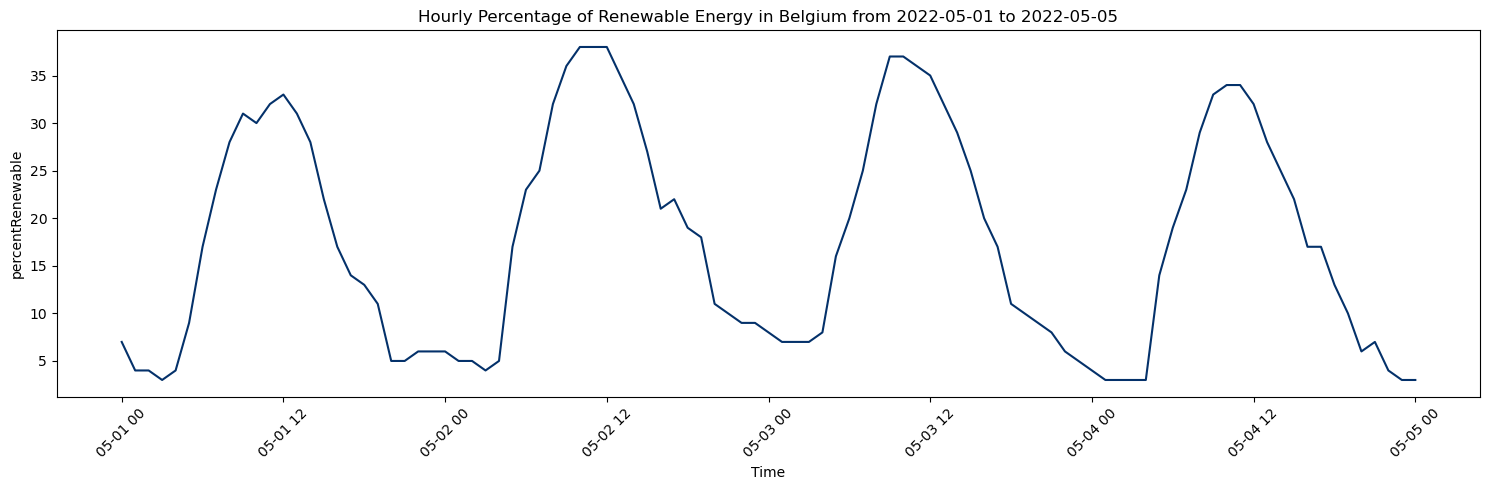

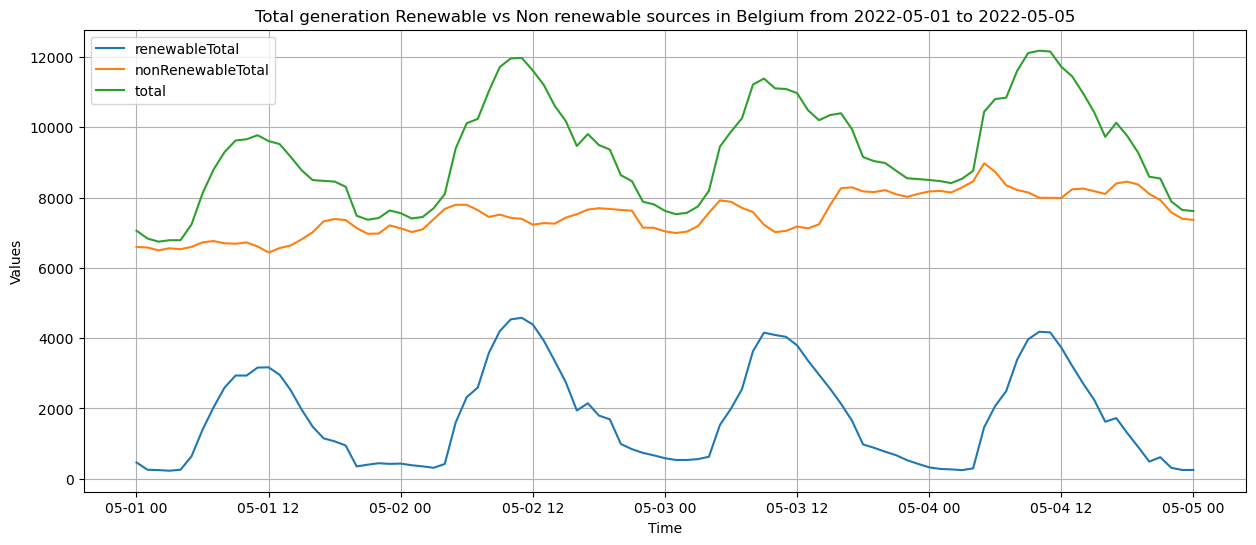

Switzerland


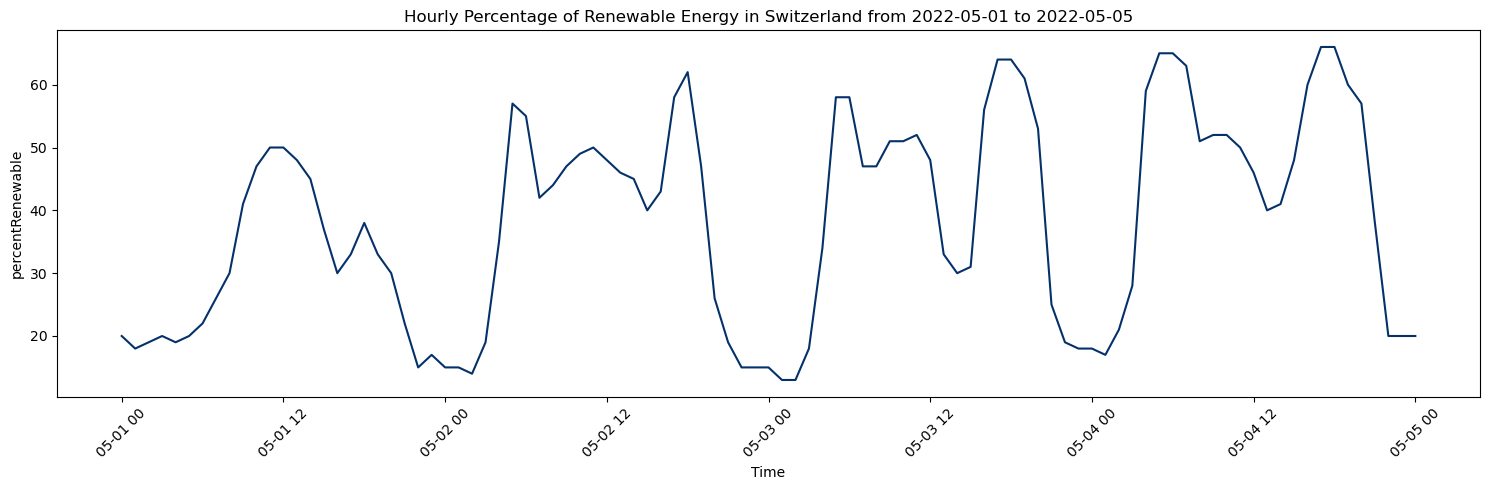

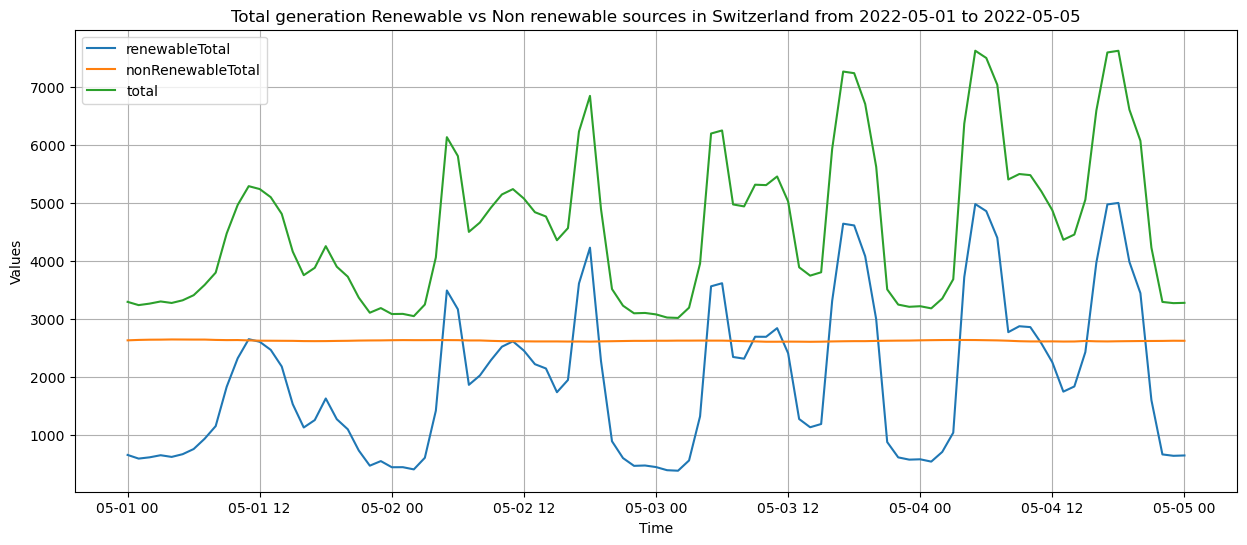

Czech Republic


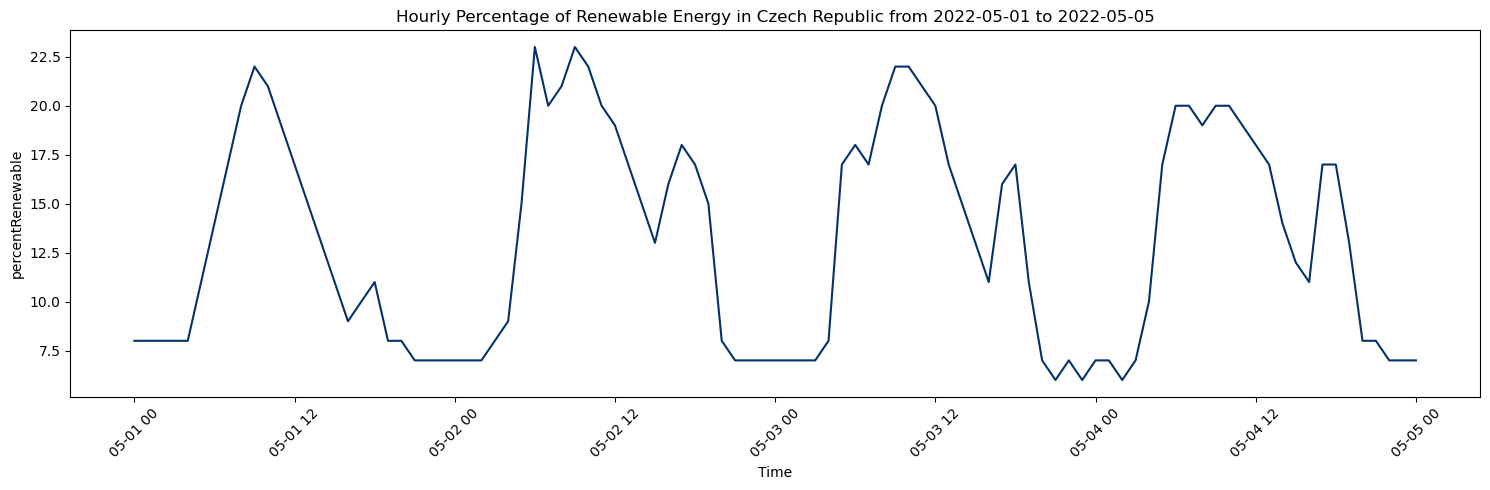

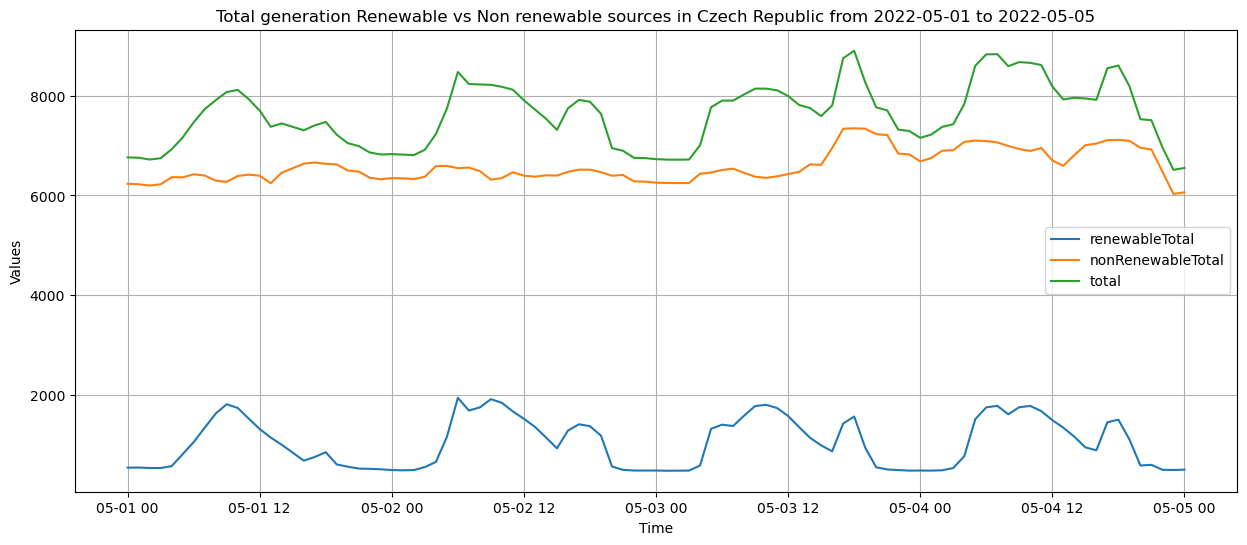

Germany


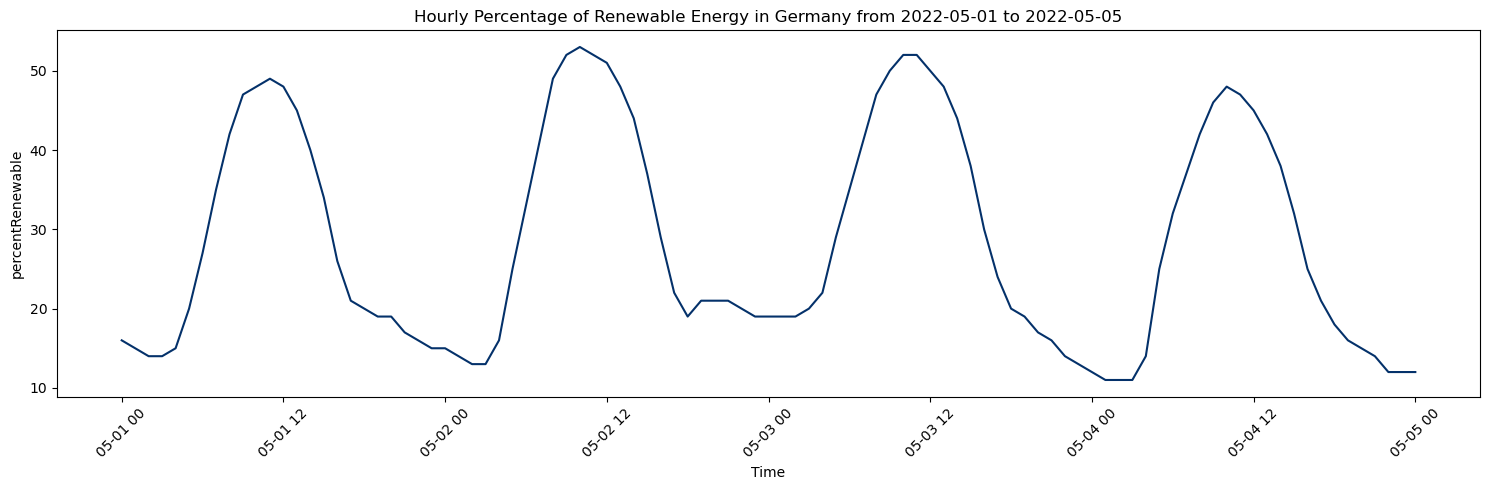

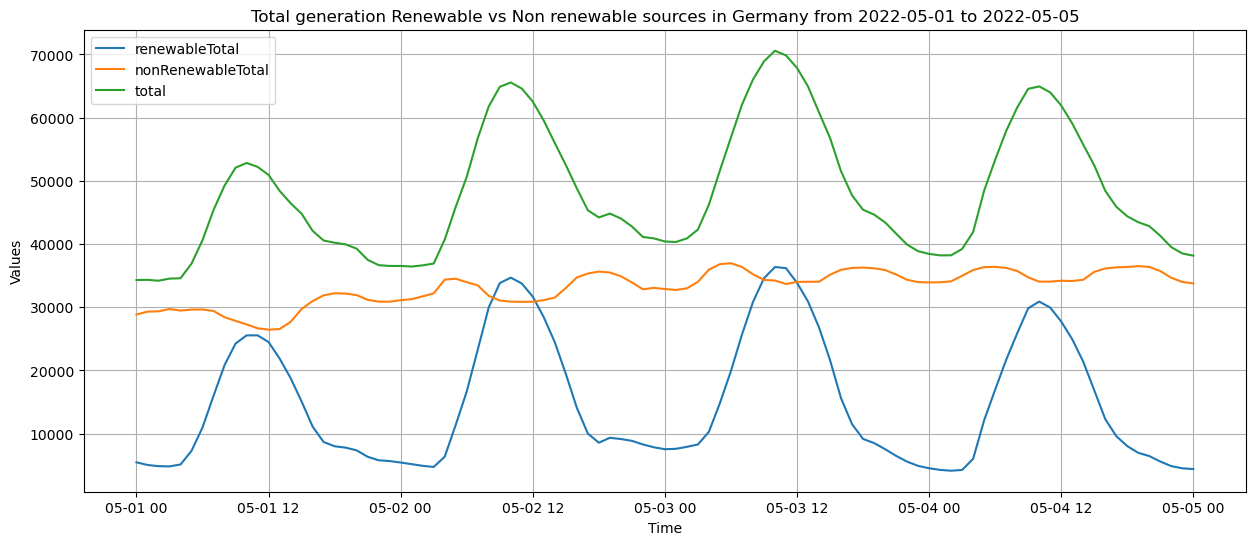

Finland


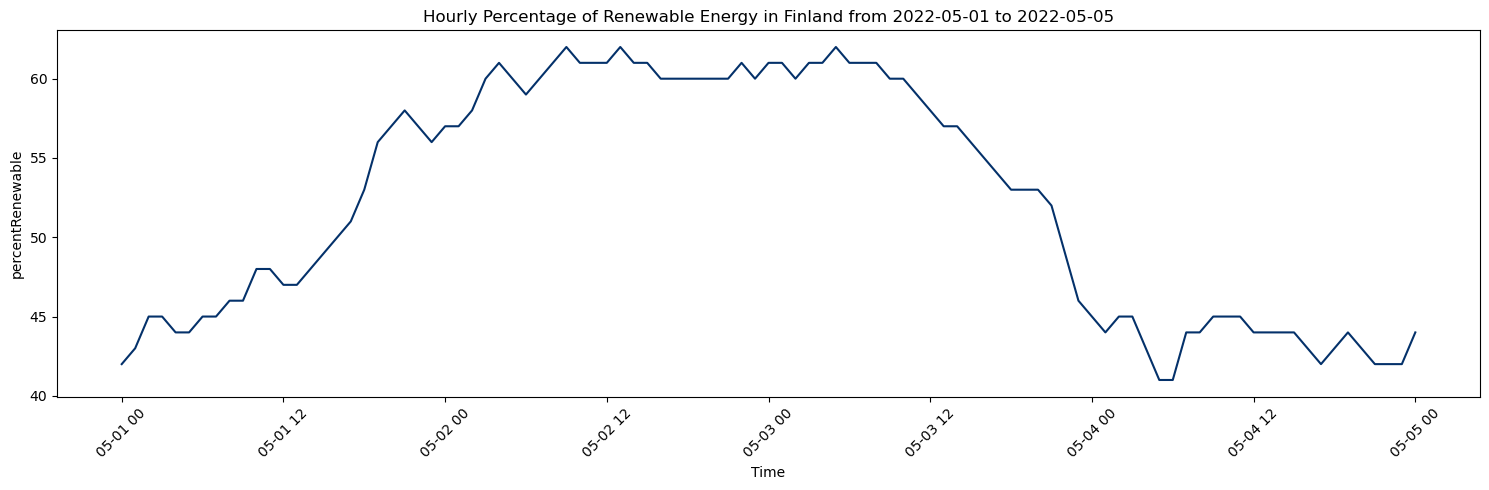

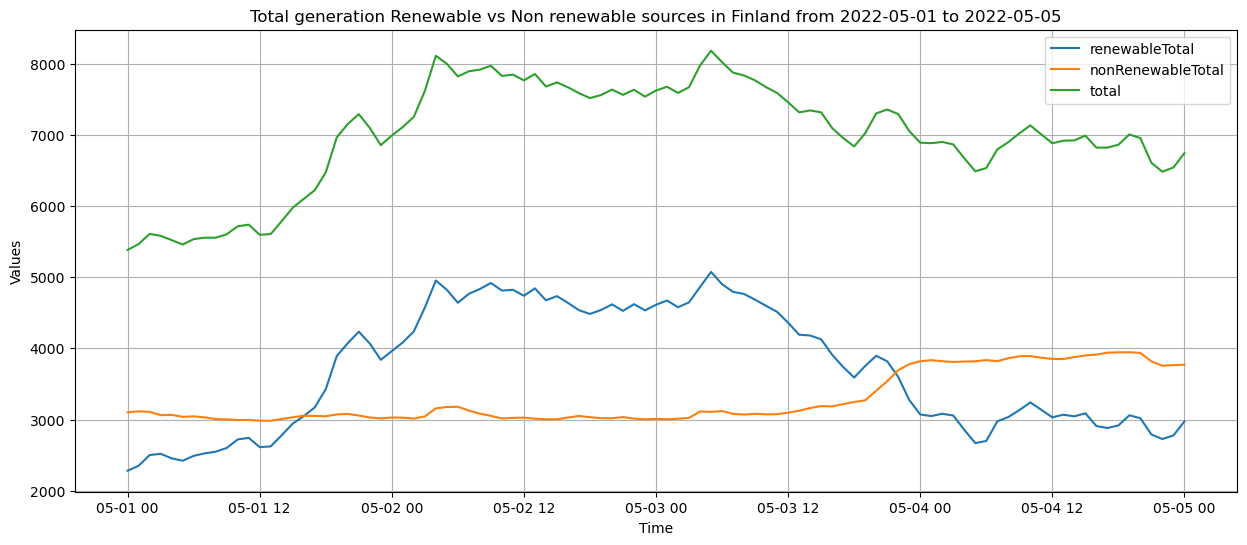

Hungary


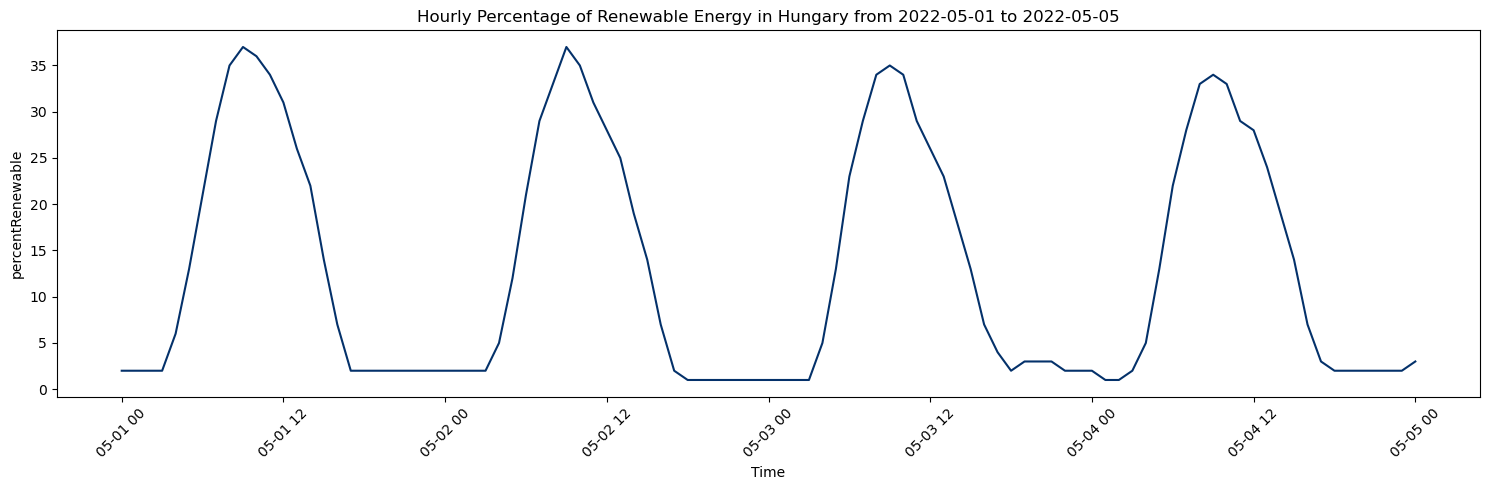

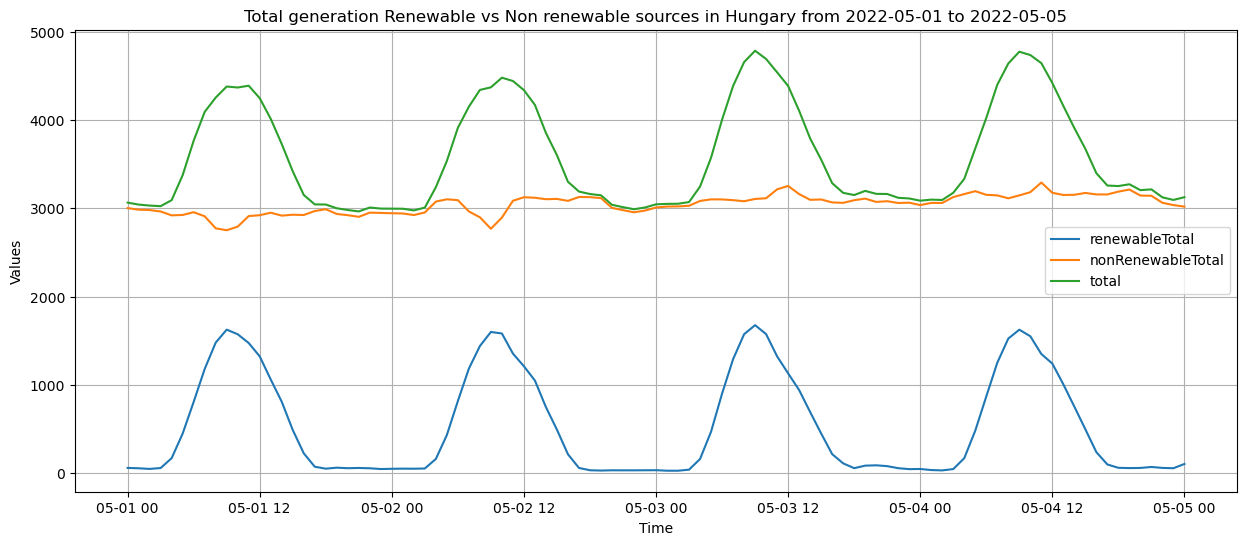

Lithuania


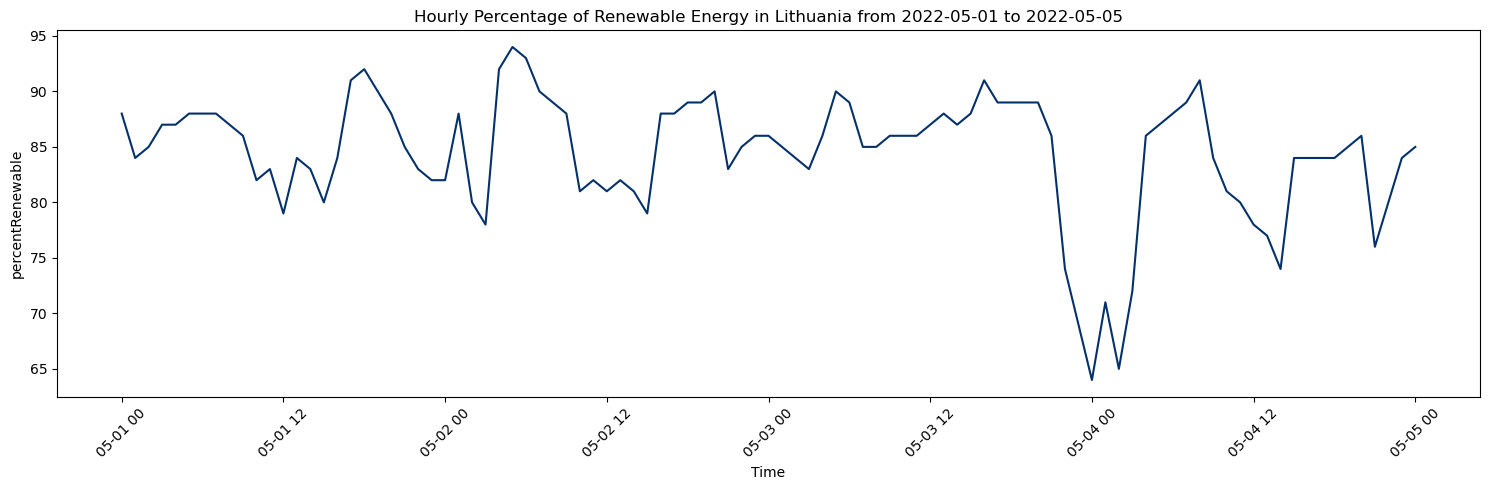

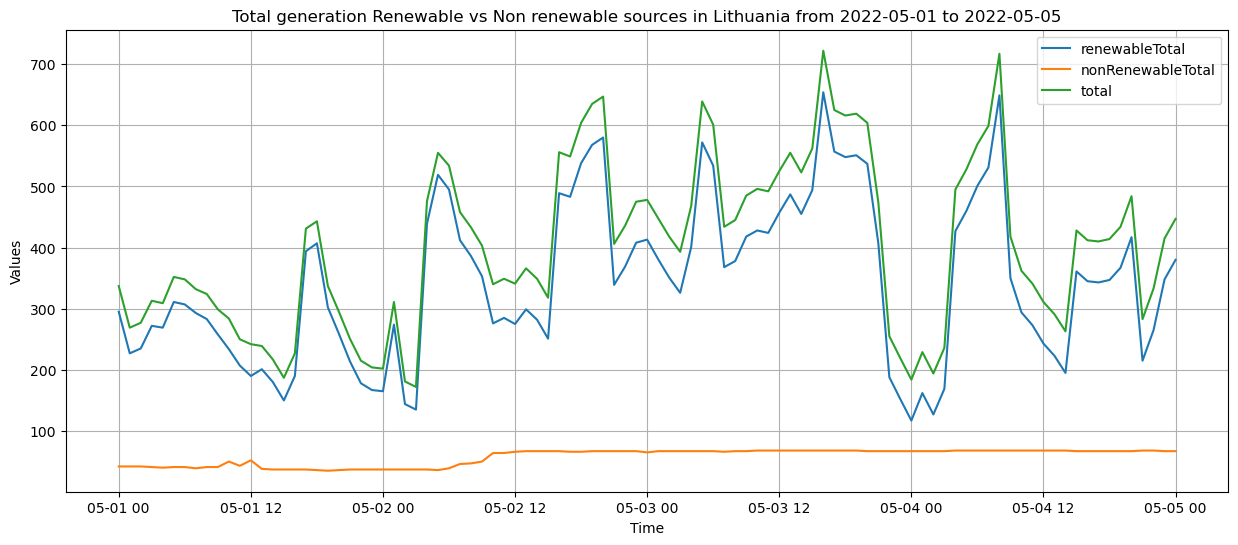

Netherlands


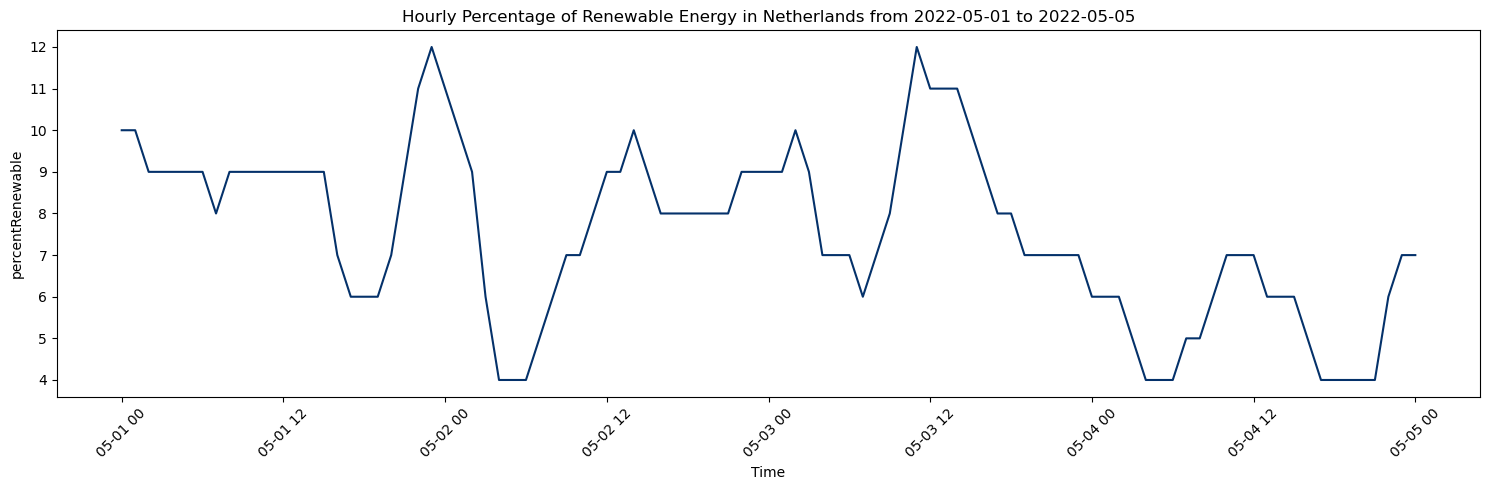

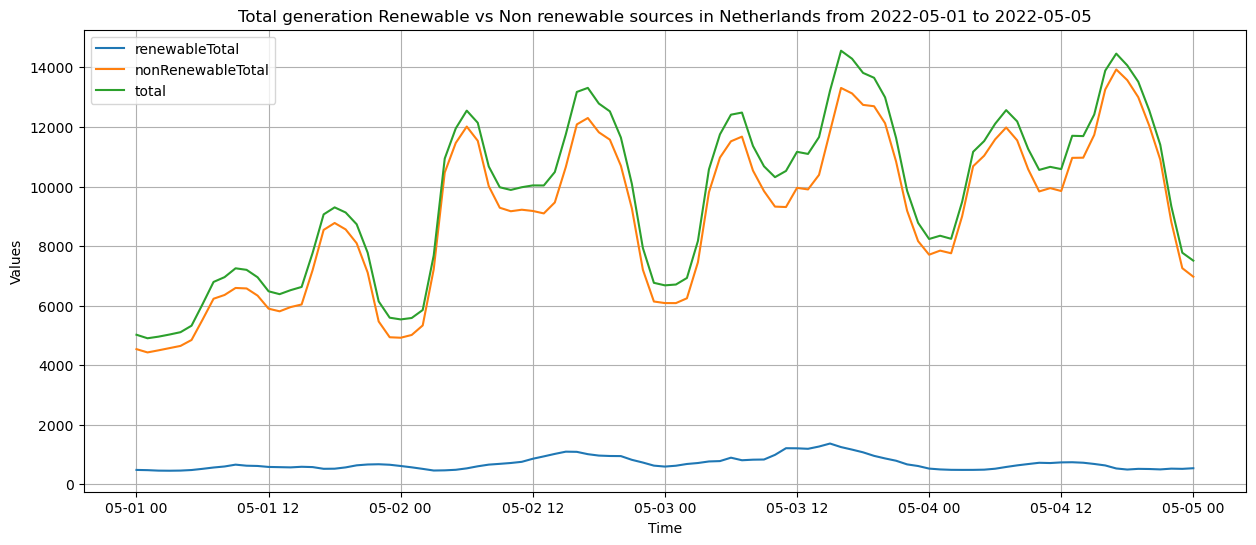

Poland


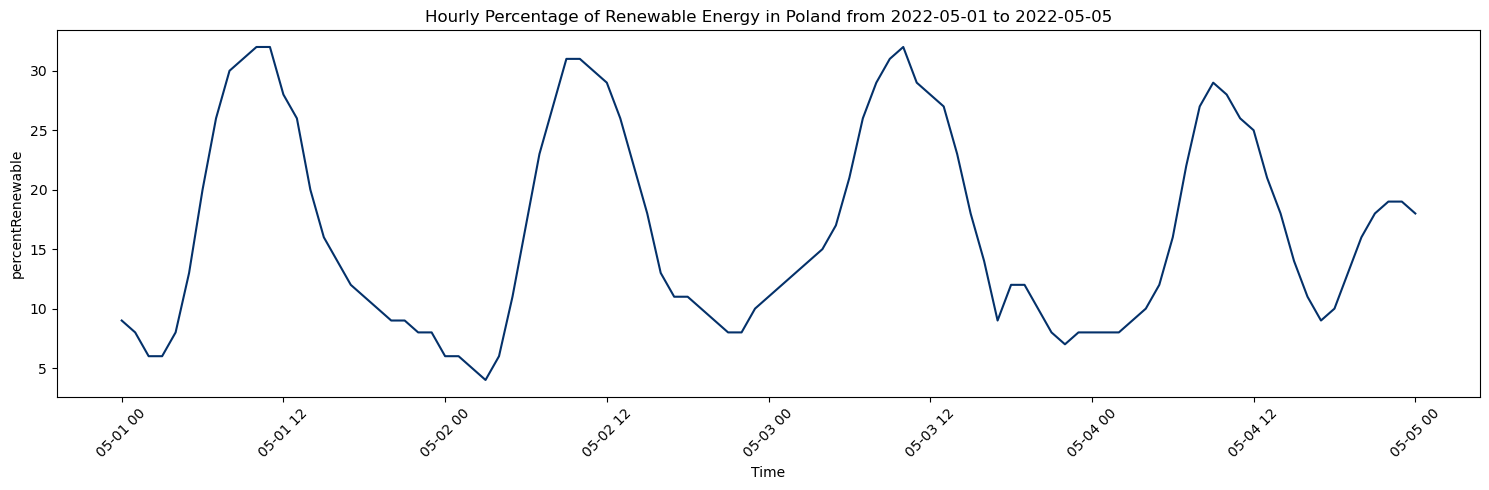

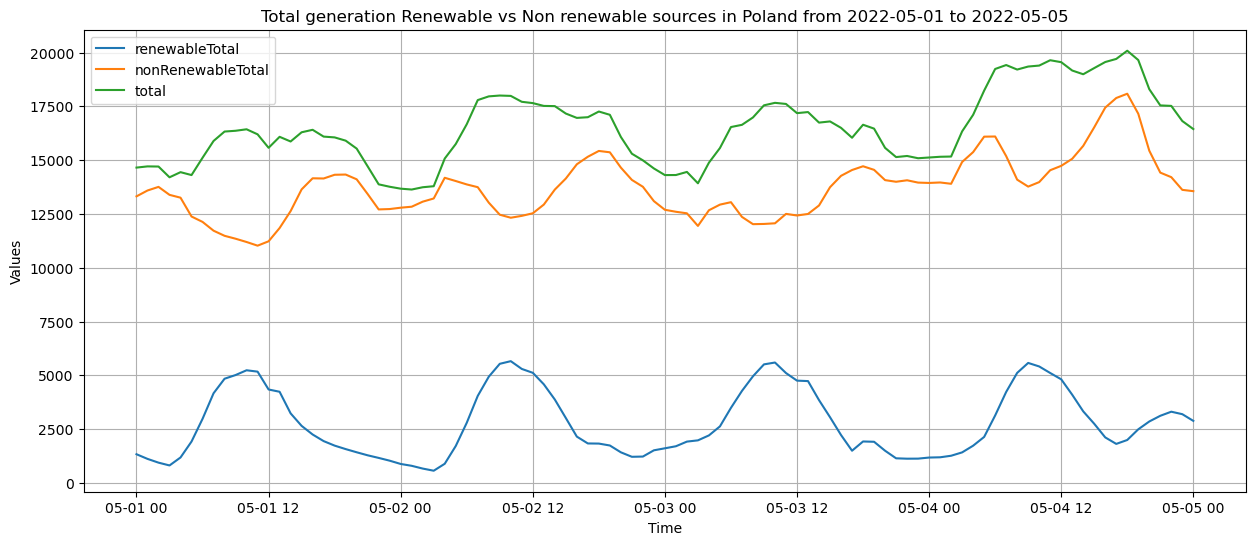

In [143]:
showHourlyPlotsforAllCountries(hourly_start_date,hourly_end_date)

## Major energy production types  
---

Finding the top 5 energy production types for a country


In [2]:
def findEnergyProductionType(data):
    renewableSources = ["Geothermal","Hydro Pumped Storage","Hydro Run-of-river and poundage","Hydro Water Reservoir","Marine","Other renewable","Solar","Waste","Wind Offshore","Wind Onshore"]
    nonRenewableSources = ["Biomass","Fossil Brown coal/Lignite","Fossil Coal-derived gas","Fossil Gas","Fossil Hard coal","Fossil Oil","Fossil Oil shale","Fossil Peal","Nuclear","Other"]
    allCols = data.columns.tolist()
    renPresent  = list(set(allCols).intersection(renewableSources))
    nonRenPresent = list(set(allCols).intersection(nonRenewableSources))
    allPresent = list(set(renPresent).union(set(nonRenPresent)))
    column_sums = data[allPresent].sum()
    d1 = column_sums.to_dict()
    st = pd.DataFrame({"type":list(d1.keys()) , "total":list(d1.values()) })
    st = st.sort_values(by='total',ascending=False)
    total = st['total'].sum()
    st['percentage'] = round((st['total'] / total) * 100)
    print(st)    
    # Generate a pie chart
    plt.figure(figsize=(7,7))
    plt.pie(column_sums, labels=column_sums.index, autopct='%1.1f%%', startangle=140)
    plt.title('Sum of Columns as a Pie Chart')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Display the pie chart
    plt.show()

    

def showPieChartsforAllCountries(start,end):
    clist = actualCountryList()
    for c in clist :
        print(countryName(c))
        data = getCountryData(c,"actual",start,end)
        findEnergyProductionType(data)
           

Belgium
                               type       total  percentage
9                           Nuclear  32559400.0        40.0
10                       Fossil Gas  23661077.0        29.0
3                     Wind Offshore   6851073.0         8.0
8                             Other   5364648.0         7.0
1                             Solar   4254550.0         5.0
7                      Wind Onshore   4081453.0         5.0
5                           Biomass   2356522.0         3.0
0                             Waste   2039826.0         2.0
2              Hydro Pumped Storage   1026556.0         1.0
6   Hydro Run-of-river and poundage    148099.0         0.0
4                        Fossil Oil      1337.0         0.0


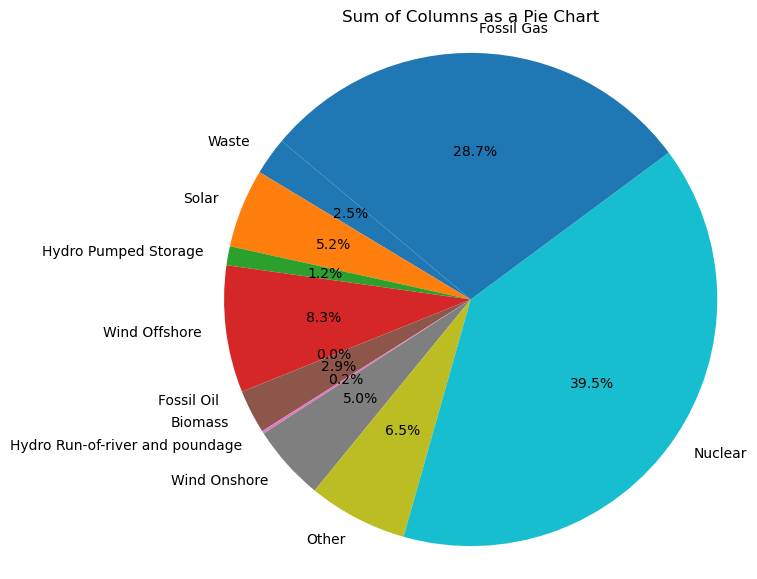

Bulgaria
                               type       total  percentage
9                           Nuclear  16379274.0        41.0
7         Fossil Brown coal/Lignite  14375787.0        36.0
10                       Fossil Gas   2159774.0         5.0
2             Hydro Water Reservoir   1809292.0         5.0
1                             Solar   1425315.0         4.0
8                      Wind Onshore   1413135.0         4.0
5   Hydro Run-of-river and poundage   1075918.0         3.0
6                  Fossil Hard coal    476634.0         1.0
3              Hydro Pumped Storage    440305.0         1.0
4                           Biomass    251470.0         1.0
0                             Waste     36761.0         0.0


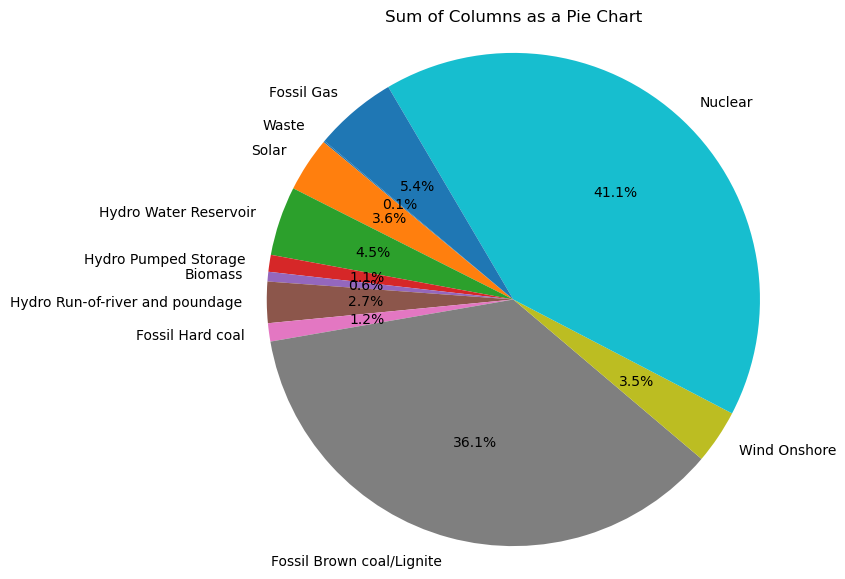

Switzerland
                              type       total  percentage
3                          Nuclear  23270855.0        50.0
1            Hydro Water Reservoir  11836333.0        25.0
4             Hydro Pumped Storage   6870656.0        15.0
0                            Solar   2371989.0         5.0
5  Hydro Run-of-river and poundage   2057661.0         4.0
2                     Wind Onshore    142154.0         0.0


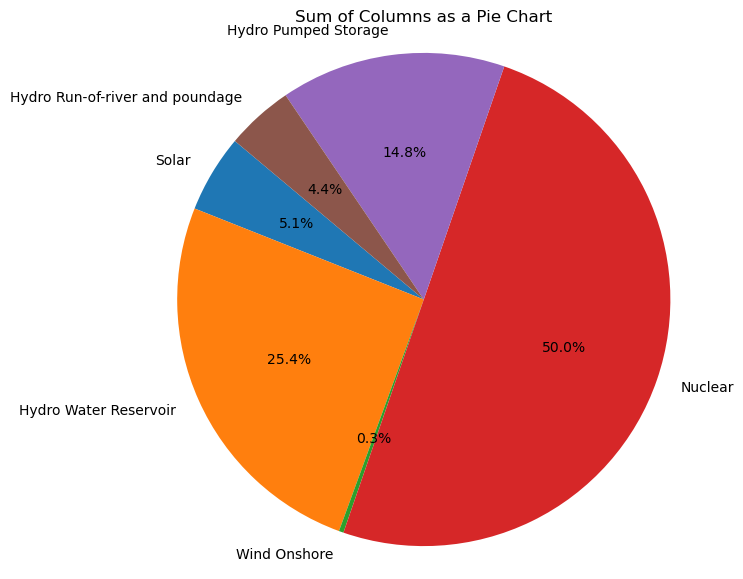

Czech Republic
                               type       total  percentage
12                          Nuclear  28189014.0        37.0
9         Fossil Brown coal/Lignite  26234866.0        35.0
13                       Fossil Gas   5388918.0         7.0
3                   Other renewable   2374310.0         3.0
6                           Biomass   2315737.0         3.0
1                             Solar   2155327.0         3.0
14          Fossil Coal-derived gas   2135103.0         3.0
8                  Fossil Hard coal   1685621.0         2.0
4              Hydro Pumped Storage   1289472.0         2.0
7   Hydro Run-of-river and poundage   1051137.0         1.0
2             Hydro Water Reservoir   1029010.0         1.0
11                            Other    886538.0         1.0
10                     Wind Onshore    683473.0         1.0
0                             Waste    188504.0         0.0
5                        Fossil Oil    104724.0         0.0


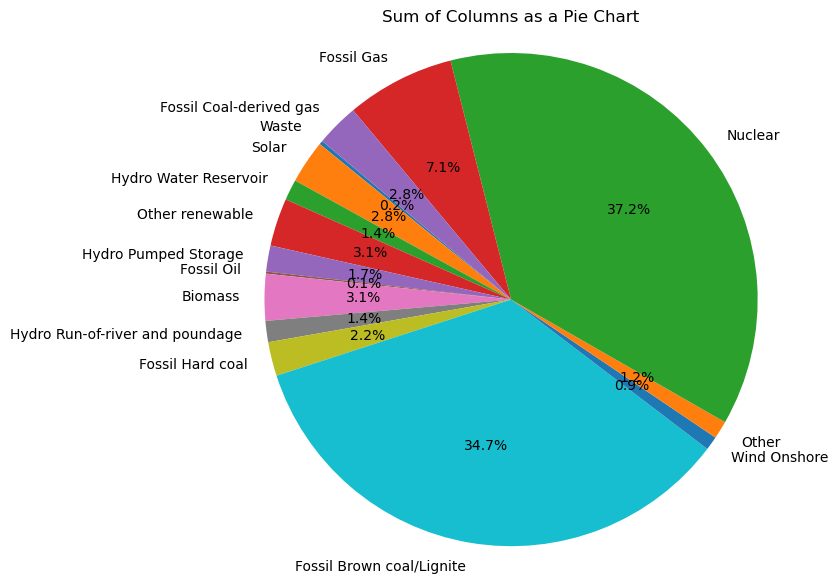

Germany
                               type         total  percentage
11                     Wind Onshore  1.025023e+08        21.0
10        Fossil Brown coal/Lignite  8.293907e+07        17.0
13                          Nuclear  6.055161e+07        12.0
14                       Fossil Gas  5.882418e+07        12.0
1                             Solar  4.574807e+07         9.0
7                           Biomass  4.059986e+07         8.0
9                  Fossil Hard coal  3.468463e+07         7.0
5                     Wind Offshore  2.673767e+07         5.0
8   Hydro Run-of-river and poundage  1.431430e+07         3.0
4              Hydro Pumped Storage  1.146742e+07         2.0
0                             Waste  5.905617e+06         1.0
6                        Fossil Oil  3.694344e+06         1.0
12                            Other  3.077688e+06         1.0
3                   Other renewable  1.400728e+06         0.0
2             Hydro Water Reservoir  1.209231e+06         0.0


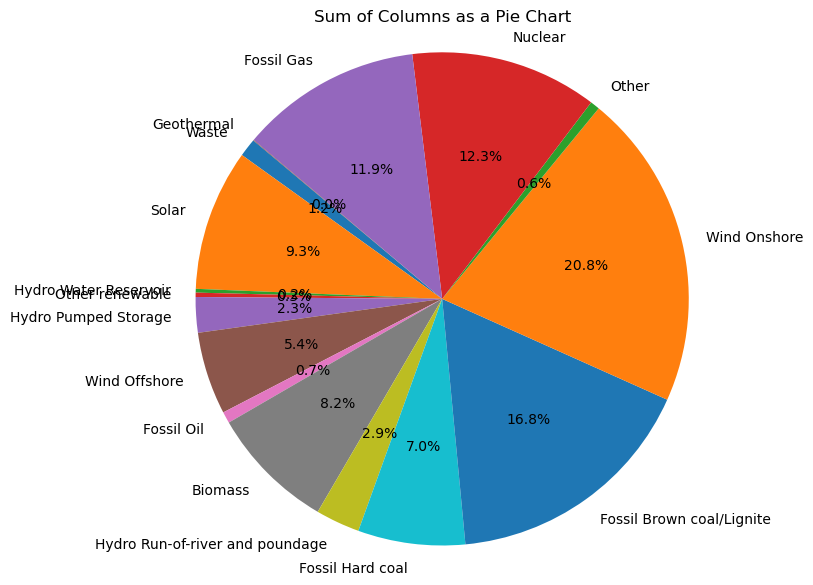

Estonia
                              type      total  percentage
8                 Fossil Oil shale  2186562.0        49.0
5                     Wind Onshore   876418.0        20.0
3                          Biomass   573361.0        13.0
9          Fossil Coal-derived gas   444028.0        10.0
0                            Waste   133902.0         3.0
1                            Solar   127670.0         3.0
2                  Other renewable    40345.0         1.0
7                       Fossil Gas    22685.0         1.0
4  Hydro Run-of-river and poundage    12890.0         0.0
6                            Other        0.0         0.0


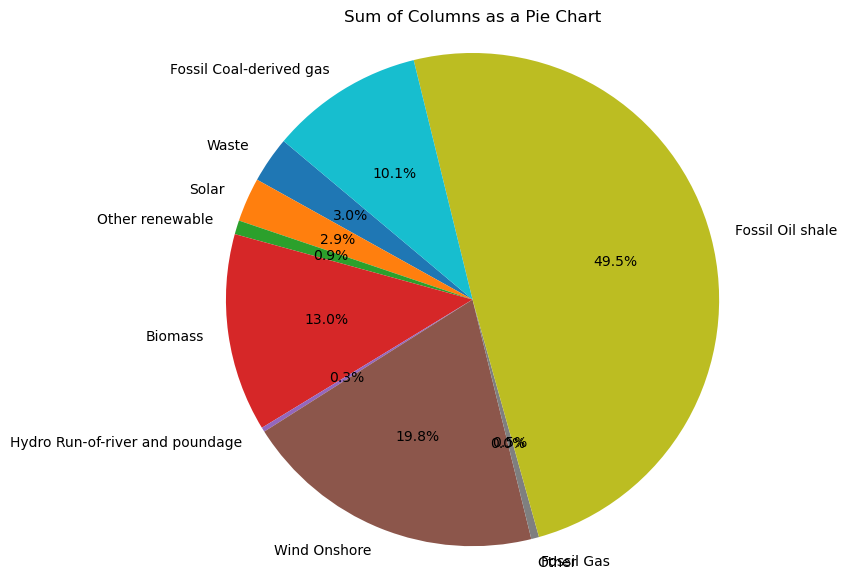

Finland
                               type       total  percentage
9                           Nuclear  22189971.0        38.0
5   Hydro Run-of-river and poundage  14328014.0        25.0
7                      Wind Onshore   7177366.0        12.0
4                           Biomass   5938196.0        10.0
10                       Fossil Gas   4117962.0         7.0
6                  Fossil Hard coal   3000518.0         5.0
8                             Other    638261.0         1.0
2                   Other renewable    202358.0         0.0
0                             Waste    141410.0         0.0
3                        Fossil Oil     17135.0         0.0
1                             Solar         0.0         0.0


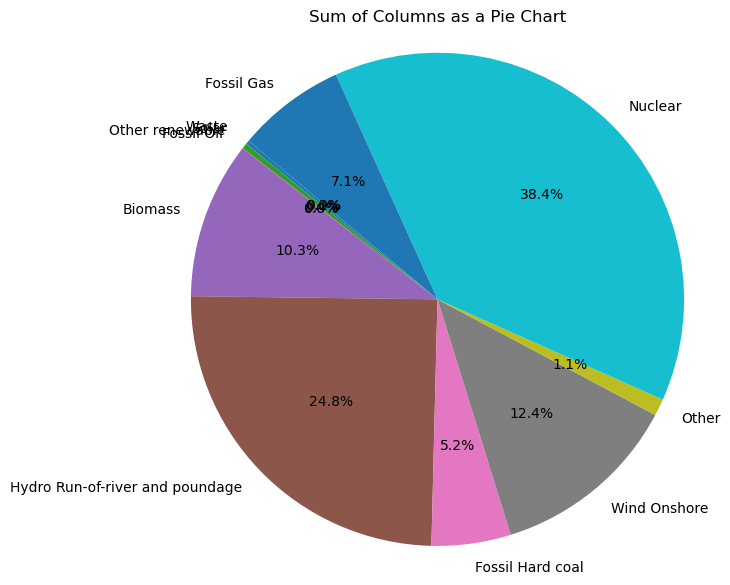

France
                               type        total  percentage
9                           Nuclear  331908504.0        68.0
6   Hydro Run-of-river and poundage   41121527.0         8.0
8                      Wind Onshore   38201730.0         8.0
10                       Fossil Gas   34278247.0         7.0
2             Hydro Water Reservoir   17548853.0         4.0
1                             Solar   12419639.0         3.0
3              Hydro Pumped Storage    5021505.0         1.0
5                           Biomass    2899914.0         1.0
0                             Waste    1693362.0         0.0
4                        Fossil Oil    1565989.0         0.0
7                  Fossil Hard coal    1381631.0         0.0


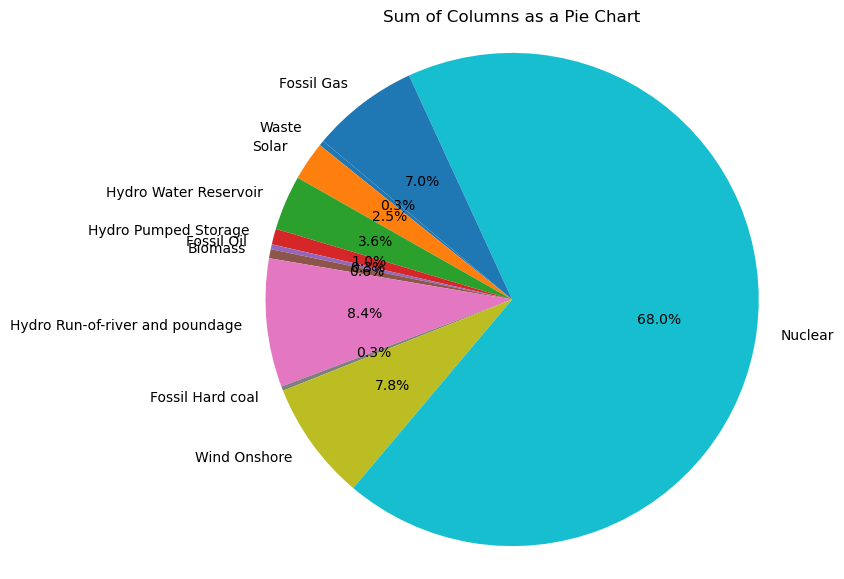

Greece
                        type       total  percentage
6                 Fossil Gas  18818173.0        48.0
3               Wind Onshore   7368232.0        19.0
0  Fossil Brown coal/Lignite   5819223.0        15.0
1                      Solar   3961062.0        10.0
2      Hydro Water Reservoir   2429330.0         6.0
4       Hydro Pumped Storage    465481.0         1.0
5                 Fossil Oil         0.0         0.0


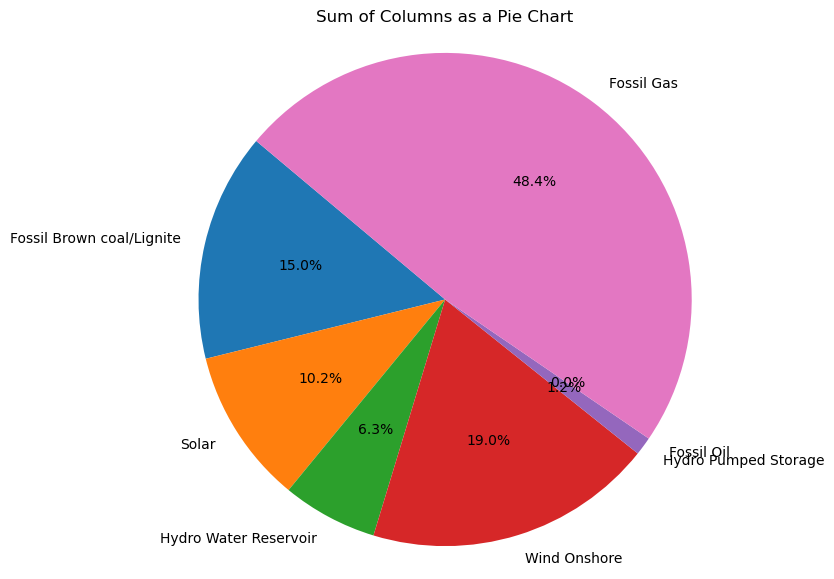

Croatia
                               type      total  percentage
2             Hydro Water Reservoir  3047478.0        25.0
10                       Fossil Gas  2920304.0        24.0
9                      Wind Onshore  1711305.0        14.0
7   Hydro Run-of-river and poundage  1696757.0        14.0
8                  Fossil Hard coal  1105713.0         9.0
6                           Biomass   498650.0         4.0
4              Hydro Pumped Storage   428870.0         4.0
3                   Other renewable   382939.0         3.0
11                       Geothermal    78584.0         1.0
1                             Solar    78034.0         1.0
5                        Fossil Oil    26669.0         0.0
0                             Waste    23624.0         0.0


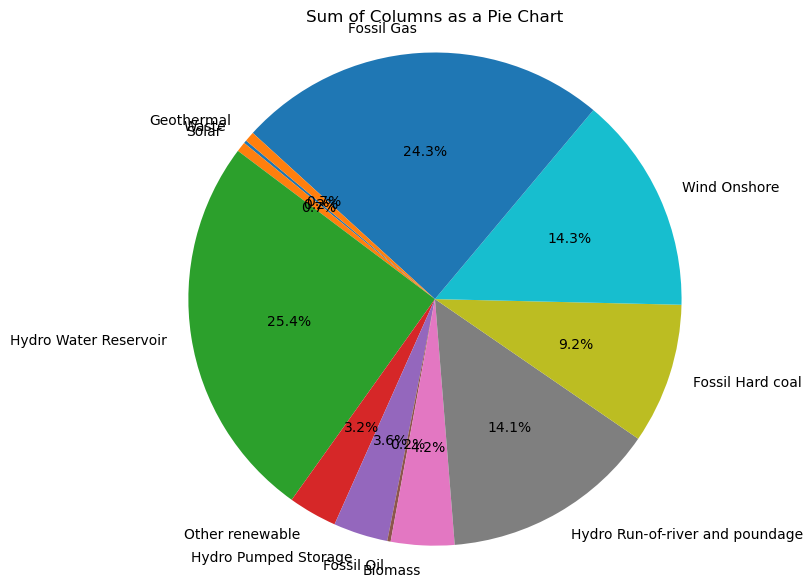

Hungary
                               type         total  percentage
11                          Nuclear  1.504354e+07        49.0
12                       Fossil Gas  7.987792e+06        26.0
8         Fossil Brown coal/Lignite  3.679109e+06        12.0
1                             Solar  1.592697e+06         5.0
5                           Biomass  1.000818e+06         3.0
9                      Wind Onshore  6.344930e+05         2.0
10                            Other  5.210111e+05         2.0
0                             Waste  1.325643e+05         0.0
3                   Other renewable  1.192987e+05         0.0
6   Hydro Run-of-river and poundage  1.134765e+05         0.0
2             Hydro Water Reservoir  1.124508e+05         0.0
7                  Fossil Hard coal  6.098450e+04         0.0
4                        Fossil Oil  4.206000e+03         0.0
13                       Geothermal  2.877500e+02         0.0


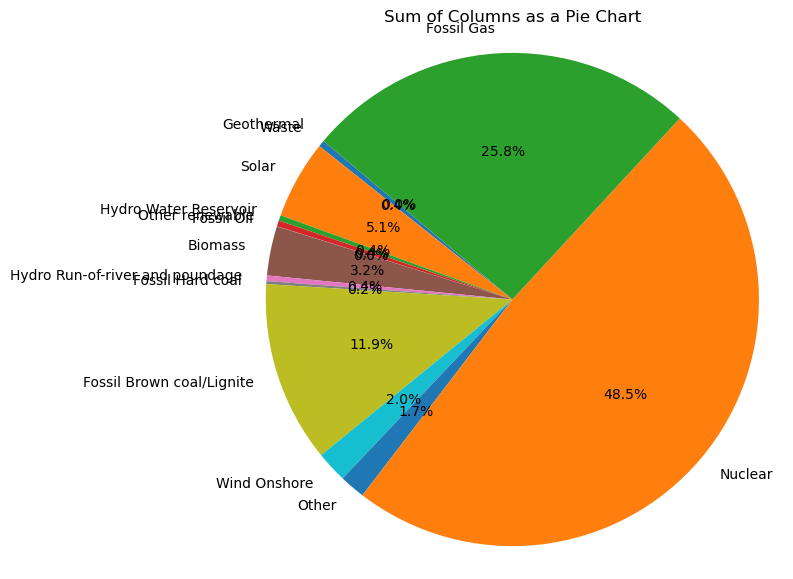

Italy
                               type        total  percentage
11                       Fossil Gas  108643003.0        45.0
7   Hydro Run-of-river and poundage   37092033.0        15.0
1                             Solar   20353113.0         8.0
9                      Wind Onshore   18432831.0         8.0
10                            Other   18090715.0         7.0
8                  Fossil Hard coal   12287508.0         5.0
2             Hydro Water Reservoir    6450454.0         3.0
12          Fossil Coal-derived gas    6251845.0         3.0
6                           Biomass    5694890.0         2.0
13                       Geothermal    5621928.0         2.0
3              Hydro Pumped Storage    3532903.0         1.0
5                        Fossil Oil     913972.0         0.0
0                             Waste     293877.0         0.0
4                     Wind Offshore          0.0         0.0


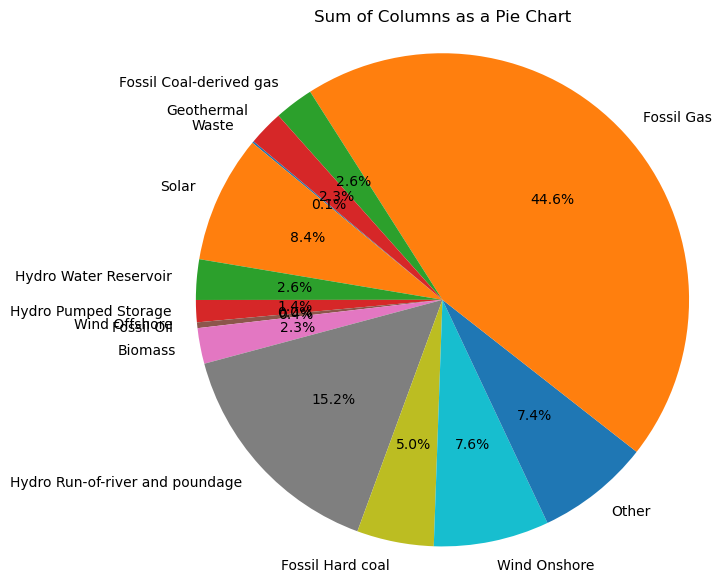

Lithuania
                              type      total  percentage
5                       Fossil Gas  1526315.0        32.0
2                     Wind Onshore  1499533.0        31.0
4             Hydro Pumped Storage   771857.0        16.0
6                          Biomass   401993.0         8.0
7  Hydro Run-of-river and poundage   259062.0         5.0
0                            Waste   147107.0         3.0
3                            Other   140381.0         3.0
1                            Solar    74092.0         2.0


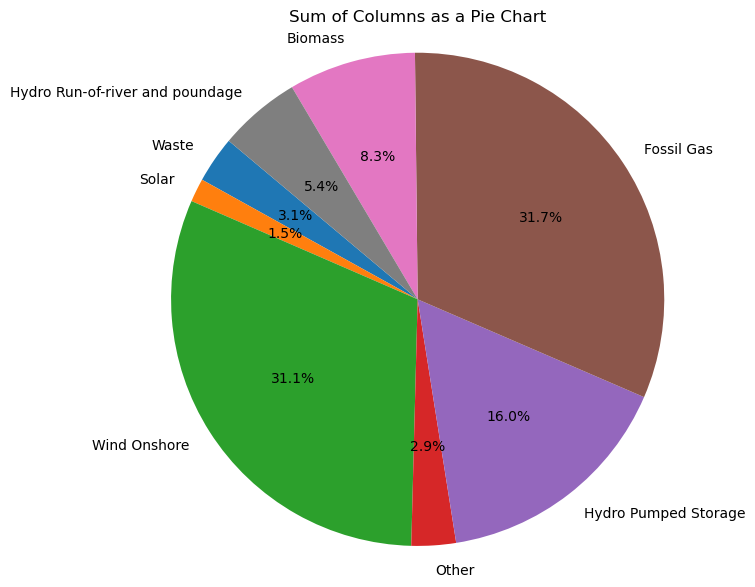

Luxembourg
                              type      total  percentage
3                     Wind Onshore  336458.75        29.0
5                          Biomass  270645.25        24.0
4                       Fossil Gas  217809.50        19.0
1                            Solar  152795.00        13.0
0                            Waste   95446.75         8.0
6  Hydro Run-of-river and poundage   61359.75         5.0
2            Hydro Water Reservoir   16726.75         1.0


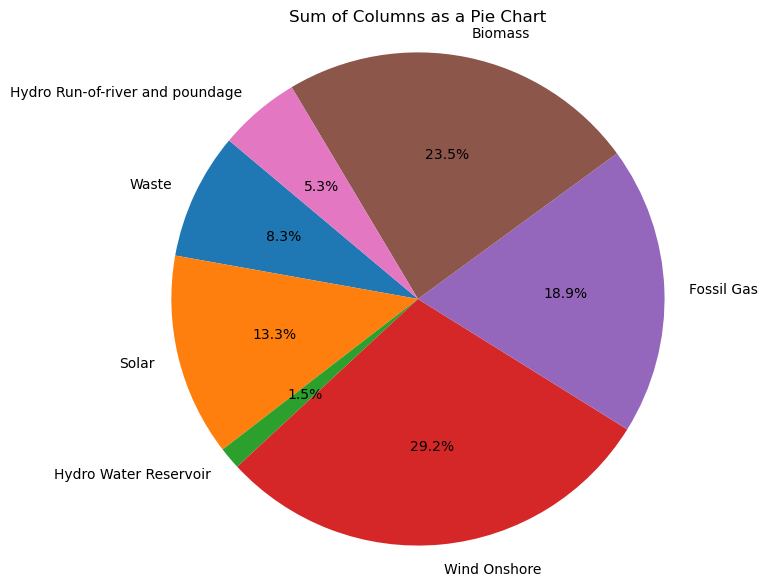

Latvia
                              type      total  percentage
4  Hydro Run-of-river and poundage  2508239.0        46.0
2                       Fossil Gas  1690375.0        31.0
1                            Other   563719.0        10.0
3                          Biomass   523855.0        10.0
0                     Wind Onshore   148346.0         3.0


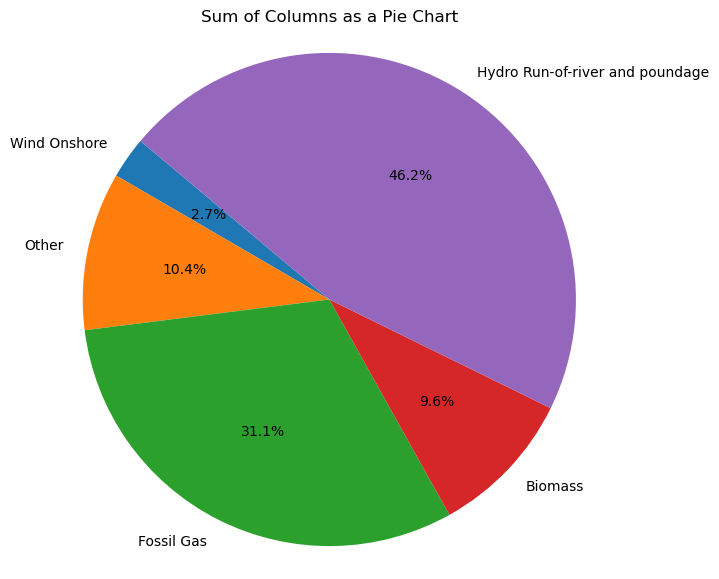

Montenegro
                        type      total  percentage
0  Fossil Brown coal/Lignite  1478009.0        48.0
1      Hydro Water Reservoir  1297195.0        42.0
2               Wind Onshore   299730.0        10.0
3            Other renewable        0.0         0.0


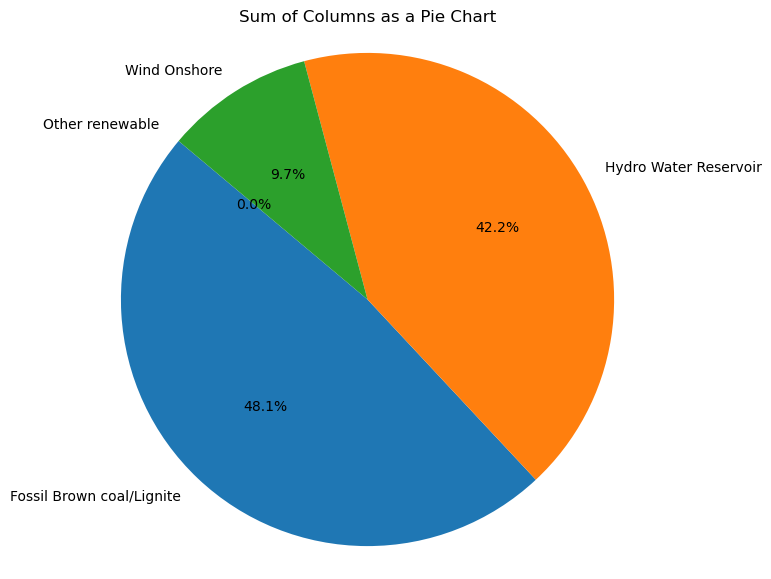

Netherlands
                              type        total  percentage
9                       Fossil Gas  55867603.50        54.0
7                            Other  17840909.75        17.0
5                 Fossil Hard coal  12043385.75        12.0
2                    Wind Offshore   5356946.00         5.0
6                     Wind Onshore   5128733.00         5.0
8                          Nuclear   3842959.25         4.0
0                            Waste   3213307.00         3.0
1                            Solar    210957.50         0.0
3                          Biomass    137355.75         0.0
4  Hydro Run-of-river and poundage         0.00         0.0


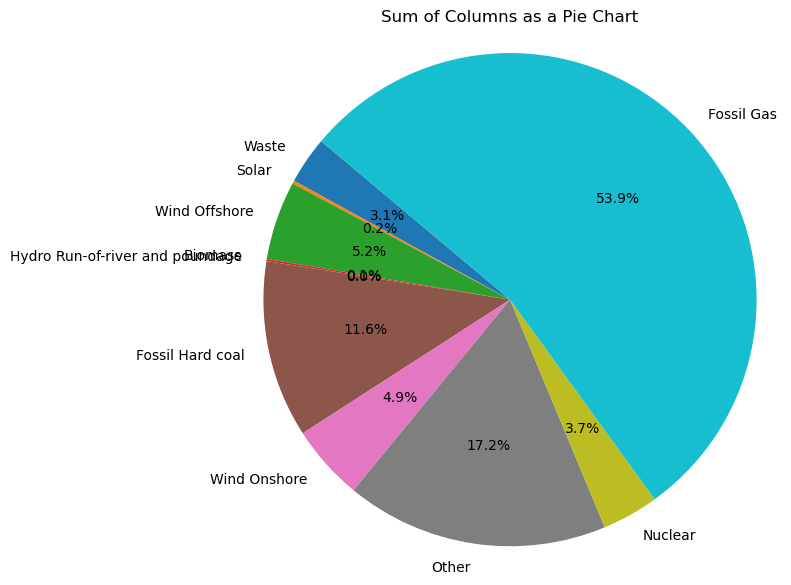

Norway
                              type        total  percentage
1            Hydro Water Reservoir  126079309.0        83.0
5  Hydro Run-of-river and poundage   11242228.0         7.0
6                     Wind Onshore    9242755.0         6.0
3             Hydro Pumped Storage    2539784.0         2.0
8                       Fossil Gas    2041800.0         1.0
7                            Other     266248.0         0.0
0                            Waste     143241.0         0.0
2                  Other renewable     116295.0         0.0
4                          Biomass          0.0         0.0


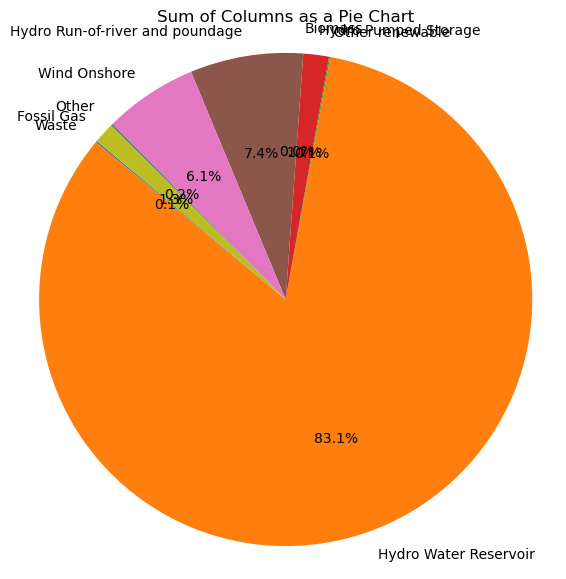

Poland
                               type       total  percentage
6                  Fossil Hard coal  70069503.0        50.0
7         Fossil Brown coal/Lignite  34389262.0        24.0
8                      Wind Onshore  15154885.0        11.0
9                        Fossil Gas  12389021.0         9.0
4                           Biomass   2071195.0         1.0
0                             Solar   1759986.0         1.0
3                        Fossil Oil   1590055.0         1.0
5   Hydro Run-of-river and poundage   1479075.0         1.0
2              Hydro Pumped Storage   1053944.0         1.0
10          Fossil Coal-derived gas    283586.0         0.0
1             Hydro Water Reservoir    136320.0         0.0


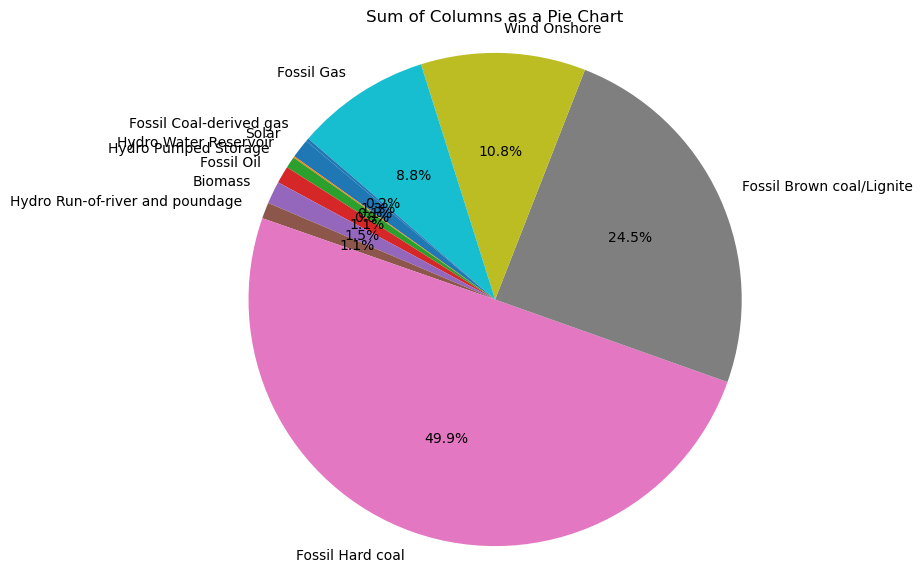

In [3]:
showPieChartsforAllCountries("2020-01-01","2020-12-30")

Belgium
                               type       total  percentage
9                           Nuclear  41510767.0        46.0
10                       Fossil Gas  19985572.0        22.0
3                     Wind Offshore   6423323.0         7.0
1                             Solar   6416900.0         7.0
8                             Other   5273203.0         6.0
7                      Wind Onshore   4278111.0         5.0
0                             Waste   2213821.0         2.0
5                           Biomass   1942387.0         2.0
2              Hydro Pumped Storage   1224721.0         1.0
6   Hydro Run-of-river and poundage     96409.0         0.0
4                        Fossil Oil      9309.0         0.0


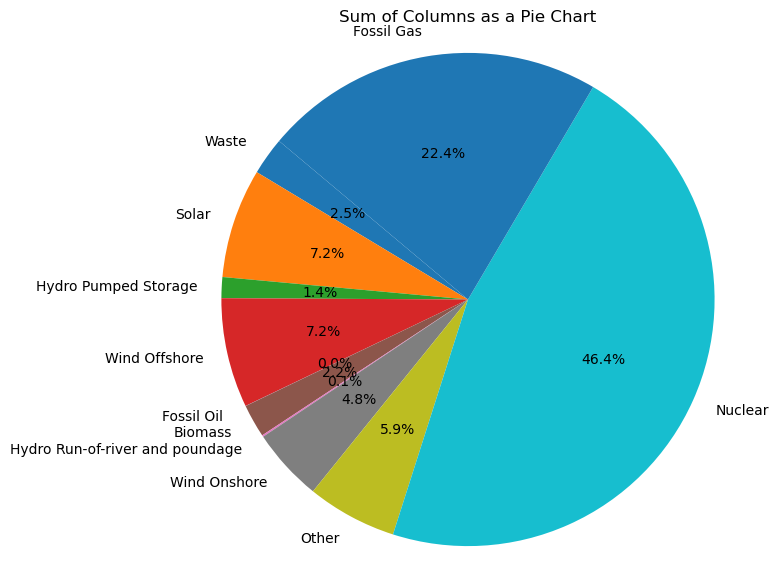

Bulgaria
                               type       total  percentage
7         Fossil Brown coal/Lignite  23106252.0        46.0
9                           Nuclear  16361796.0        33.0
10                       Fossil Gas   2621760.0         5.0
2             Hydro Water Reservoir   2373429.0         5.0
1                             Solar   1652898.0         3.0
8                      Wind Onshore   1400811.0         3.0
5   Hydro Run-of-river and poundage   1378499.0         3.0
6                  Fossil Hard coal    526981.0         1.0
4                           Biomass    249307.0         1.0
0                             Waste     33647.0         0.0
3              Hydro Pumped Storage      6866.0         0.0


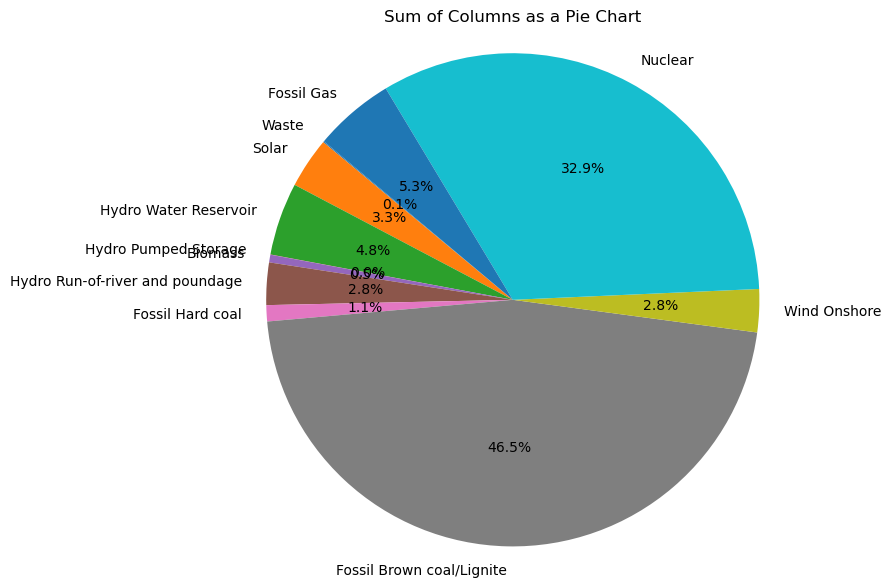

Switzerland
                              type       total  percentage
3                          Nuclear  23439869.0        55.0
1            Hydro Water Reservoir   8105451.0        19.0
4             Hydro Pumped Storage   5692379.0        13.0
0                            Solar   3038207.0         7.0
5  Hydro Run-of-river and poundage   1844700.0         4.0
2                     Wind Onshore    148189.0         0.0


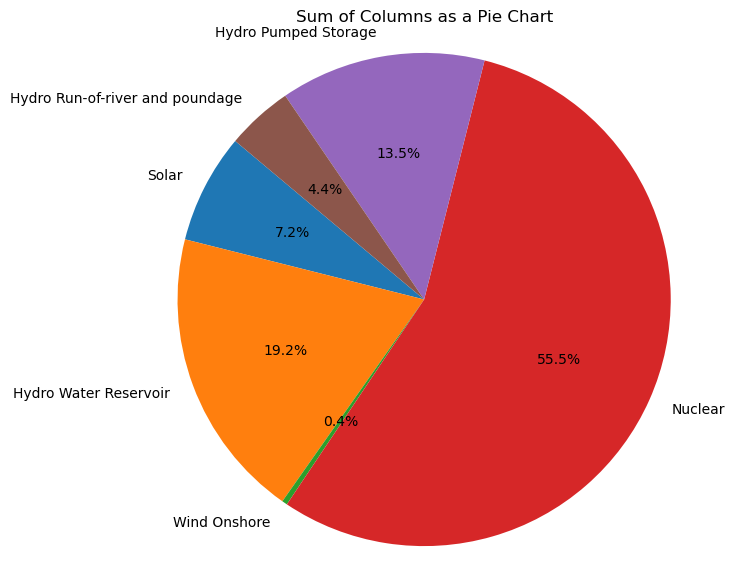

Czech Republic
                               type       total  percentage
9         Fossil Brown coal/Lignite  30327404.0        39.0
12                          Nuclear  29133781.0        37.0
13                       Fossil Gas   5279184.0         7.0
8                  Fossil Hard coal   2671560.0         3.0
6                           Biomass   2402824.0         3.0
1                             Solar   2364099.0         3.0
3                   Other renewable   2345821.0         3.0
2             Hydro Water Reservoir   1073123.0         1.0
7   Hydro Run-of-river and poundage    986799.0         1.0
4              Hydro Pumped Storage    966186.0         1.0
10                     Wind Onshore    633569.0         1.0
0                             Waste    184048.0         0.0
14          Fossil Coal-derived gas    141142.0         0.0
11                            Other    129560.0         0.0
5                        Fossil Oil     31584.0         0.0


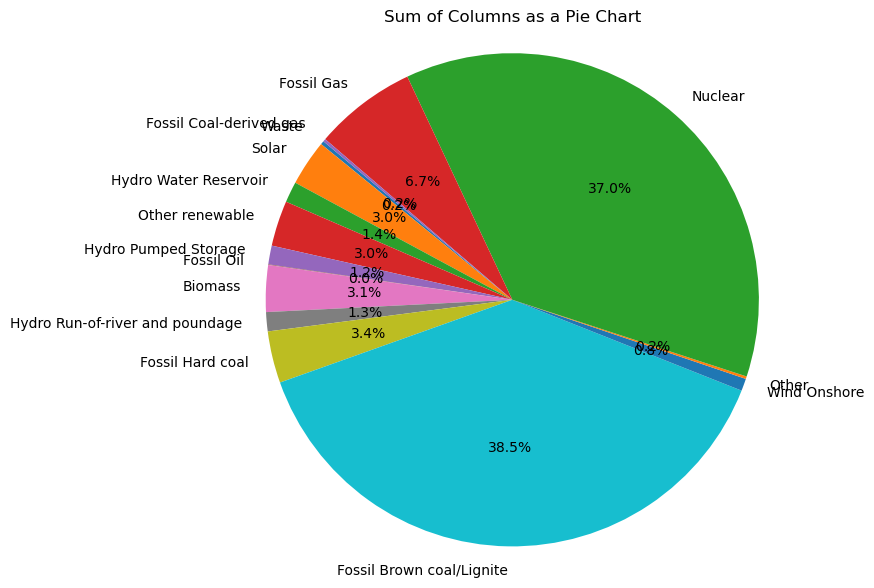

Germany
                               type         total  percentage
10        Fossil Brown coal/Lignite  1.033278e+08        21.0
11                     Wind Onshore  9.925724e+07        20.0
9                  Fossil Hard coal  6.276370e+07        13.0
1                             Solar  5.535592e+07        11.0
7                           Biomass  3.925439e+07         8.0
14                       Fossil Gas  3.809631e+07         8.0
13                          Nuclear  3.266412e+07         7.0
5                     Wind Offshore  2.453178e+07         5.0
8   Hydro Run-of-river and poundage  1.119828e+07         2.0
4              Hydro Pumped Storage  1.055119e+07         2.0
0                             Waste  6.388094e+06         1.0
6                        Fossil Oil  2.774627e+06         1.0
12                            Other  2.293505e+06         0.0
2             Hydro Water Reservoir  1.122491e+06         0.0
3                   Other renewable  1.023943e+06         0.0


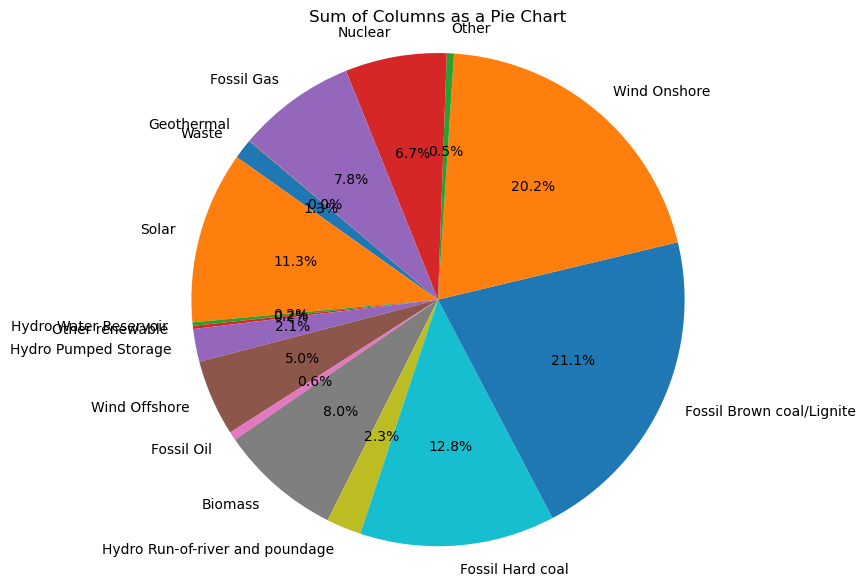

Estonia
                              type      total  percentage
8                 Fossil Oil shale  4138983.0        58.0
3                          Biomass  1202416.0        17.0
5                     Wind Onshore   676505.0         9.0
1                            Solar   559010.0         8.0
9          Fossil Coal-derived gas   361872.0         5.0
0                            Waste   121988.0         2.0
7                       Fossil Gas    33562.0         0.0
2                  Other renewable    26689.0         0.0
4  Hydro Run-of-river and poundage    17641.0         0.0
6                            Other        0.0         0.0


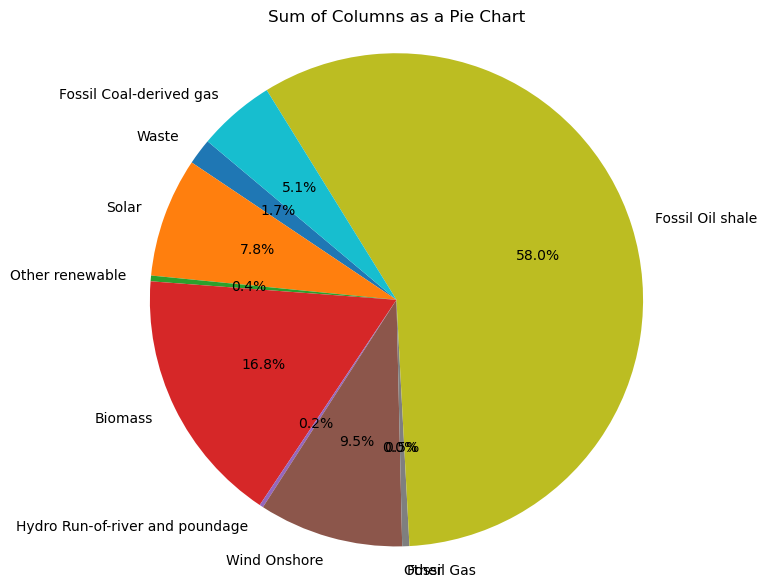

Finland
                               type       total  percentage
9                           Nuclear  23912864.0        40.0
5   Hydro Run-of-river and poundage  12329153.0        21.0
7                      Wind Onshore  10954561.0        18.0
4                           Biomass   5911506.0        10.0
6                  Fossil Hard coal   3786194.0         6.0
10                       Fossil Gas   1787953.0         3.0
8                             Other    607530.0         1.0
0                             Waste    180324.0         0.0
3                        Fossil Oil     45487.0         0.0
2                   Other renewable     26026.0         0.0
1                             Solar         0.0         0.0


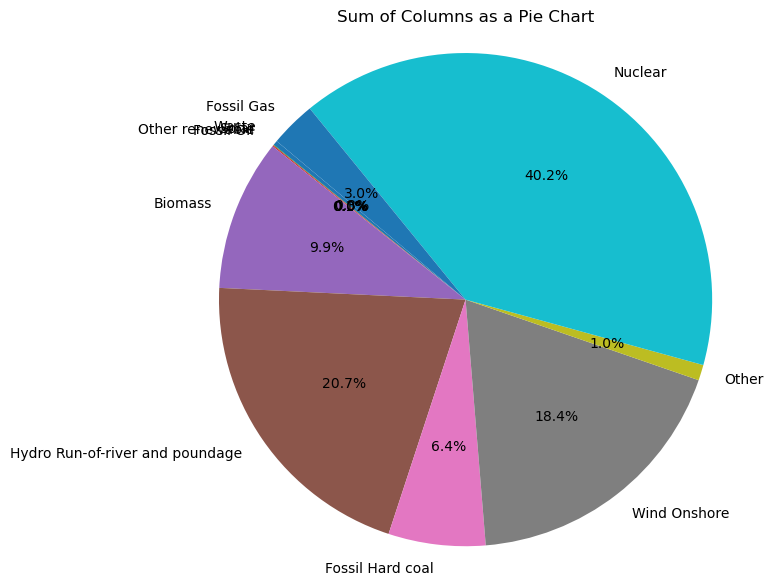

France
                               type        total  percentage
9                           Nuclear  276695055.0        64.0
10                       Fossil Gas   42183355.0        10.0
8                      Wind Onshore   36255158.0         8.0
6   Hydro Run-of-river and poundage   32991417.0         8.0
1                             Solar   17932817.0         4.0
2             Hydro Water Reservoir    9731071.0         2.0
3              Hydro Pumped Storage    5170868.0         1.0
5                           Biomass    3511995.0         1.0
7                  Fossil Hard coal    3045474.0         1.0
4                        Fossil Oil    1827453.0         0.0
0                             Waste    1403719.0         0.0


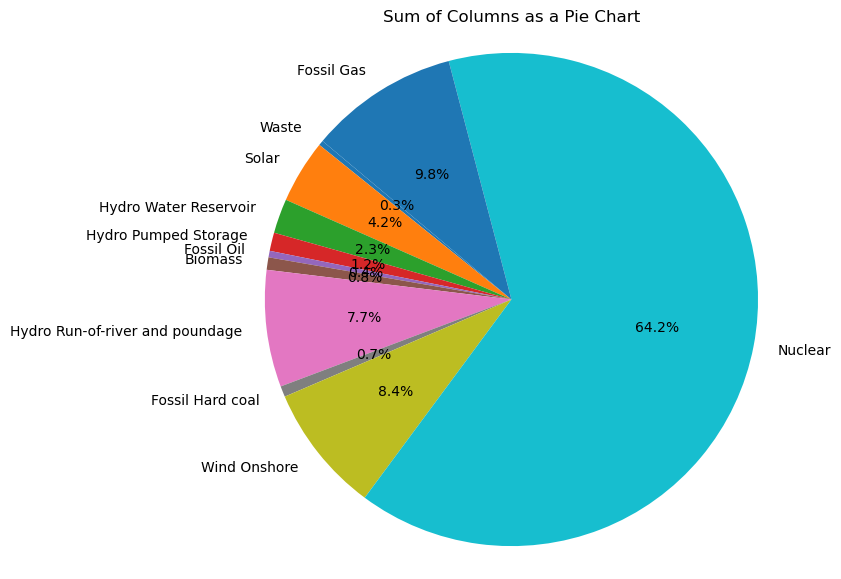

Greece
                        type       total  percentage
6                 Fossil Gas  18968708.0        44.0
3               Wind Onshore   9385163.0        22.0
1                      Solar   5638126.0        13.0
0  Fossil Brown coal/Lignite   5570302.0        13.0
2      Hydro Water Reservoir   3371118.0         8.0
4       Hydro Pumped Storage    643180.0         1.0
5                 Fossil Oil         0.0         0.0


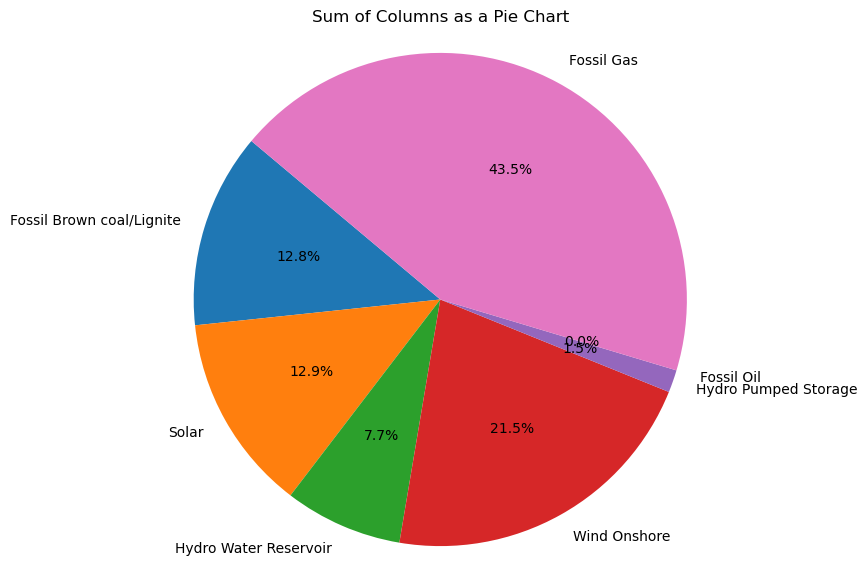

Croatia
                               type      total  percentage
2             Hydro Water Reservoir  3252325.0        25.0
10                       Fossil Gas  3182595.0        25.0
9                      Wind Onshore  2288312.0        18.0
8                  Fossil Hard coal  1421238.0        11.0
7   Hydro Run-of-river and poundage  1195495.0         9.0
6                           Biomass   629033.0         5.0
4              Hydro Pumped Storage   418988.0         3.0
3                   Other renewable   324407.0         3.0
1                             Solar    94417.0         1.0
11                       Geothermal    61011.0         0.0
0                             Waste    44884.0         0.0
5                        Fossil Oil        0.0         0.0


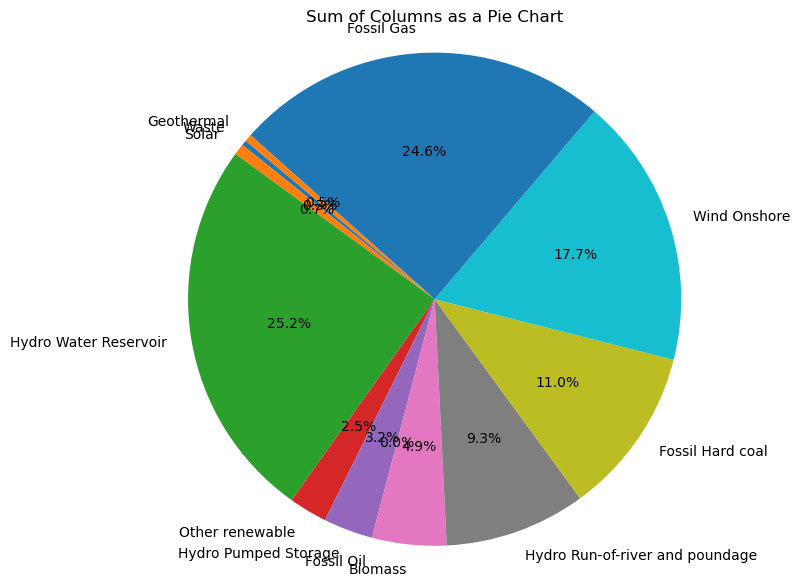

Hungary
                               type         total  percentage
11                          Nuclear  1.483424e+07        47.0
12                       Fossil Gas  7.795637e+06        25.0
1                             Solar  3.076294e+06        10.0
8         Fossil Brown coal/Lignite  2.881052e+06         9.0
5                           Biomass  1.109033e+06         4.0
9                      Wind Onshore  5.826145e+05         2.0
10                            Other  5.559330e+05         2.0
0                             Waste  1.287068e+05         0.0
3                   Other renewable  1.069822e+05         0.0
6   Hydro Run-of-river and poundage  7.930400e+04         0.0
2             Hydro Water Reservoir  7.482800e+04         0.0
7                  Fossil Hard coal  3.775875e+04         0.0
4                        Fossil Oil  2.109783e+04         0.0
13                       Geothermal  7.367500e+02         0.0


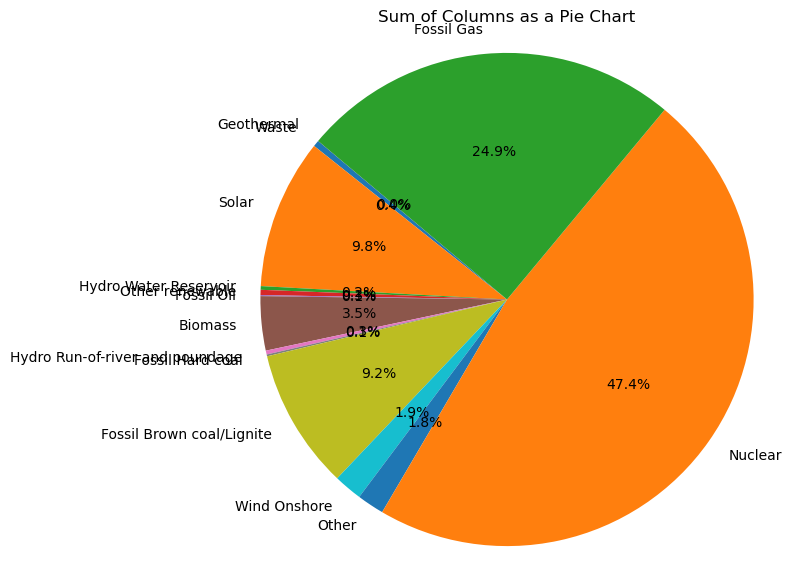

Italy
                               type        total  percentage
11                       Fossil Gas  116974199.0        47.0
7   Hydro Run-of-river and poundage   22899737.0         9.0
1                             Solar   22424705.0         9.0
8                  Fossil Hard coal   20724995.0         8.0
9                      Wind Onshore   20014319.0         8.0
10                            Other   17935002.0         7.0
12          Fossil Coal-derived gas    6042058.0         2.0
6                           Biomass    5519764.0         2.0
13                       Geothermal    5415927.0         2.0
2             Hydro Water Reservoir    3336977.0         1.0
3              Hydro Pumped Storage    3119732.0         1.0
5                        Fossil Oil    2386909.0         1.0
0                             Waste     287232.0         0.0
4                     Wind Offshore      20291.0         0.0


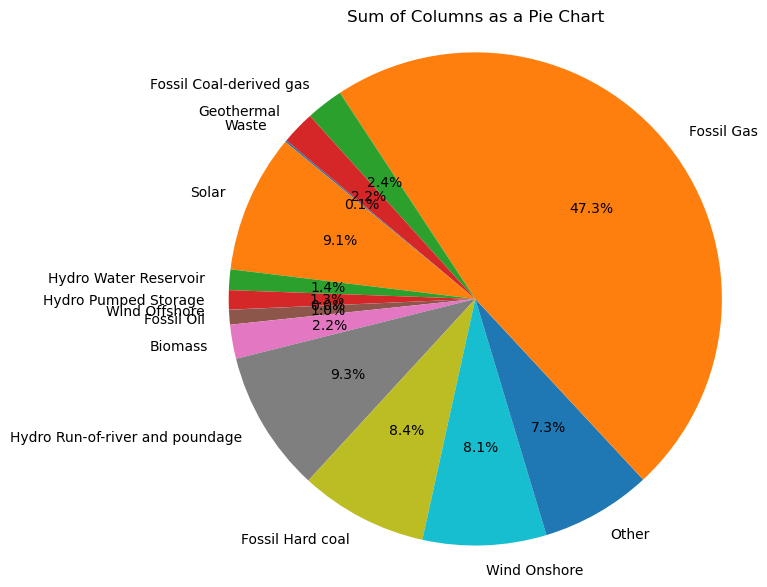

Lithuania
                              type      total  percentage
2                     Wind Onshore  1454241.0        36.0
4             Hydro Pumped Storage   550528.0        14.0
5                       Fossil Gas   497865.0        12.0
7  Hydro Run-of-river and poundage   395193.0        10.0
6                          Biomass   364456.0         9.0
1                            Solar   351650.0         9.0
0                            Waste   350344.0         9.0
3                            Other    59604.0         1.0


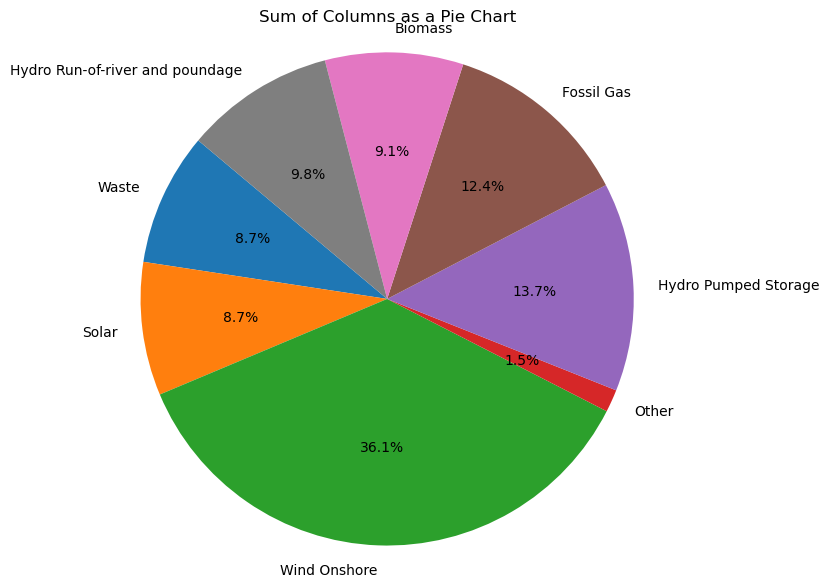

Luxembourg
                              type      total  percentage
3                     Wind Onshore  303281.75        27.0
5                          Biomass  287049.75        25.0
1                            Solar  260011.75        23.0
4                       Fossil Gas  134452.00        12.0
0                            Waste   90876.25         8.0
6  Hydro Run-of-river and poundage   46975.00         4.0
2            Hydro Water Reservoir    9261.75         1.0


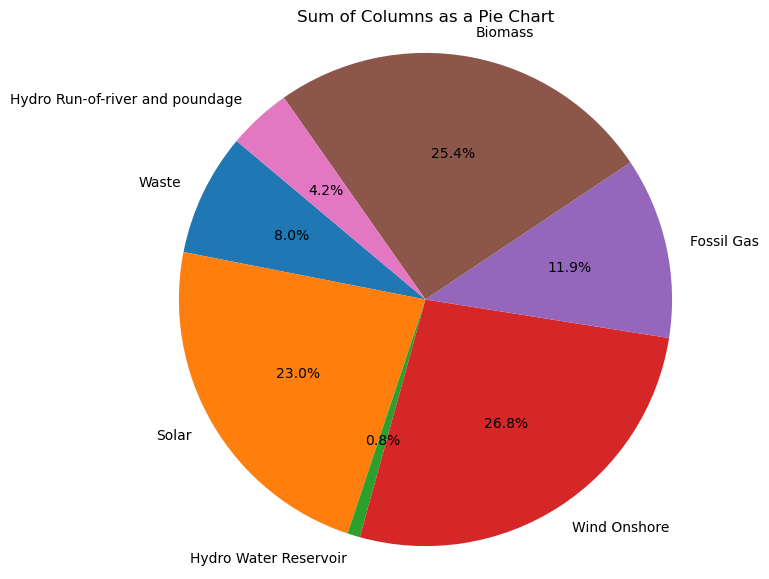

Latvia
                              type      total  percentage
4  Hydro Run-of-river and poundage  2638498.0        59.0
2                       Fossil Gas  1098912.0        25.0
3                          Biomass   324124.0         7.0
1                            Other   247082.0         6.0
0                     Wind Onshore   168428.0         4.0


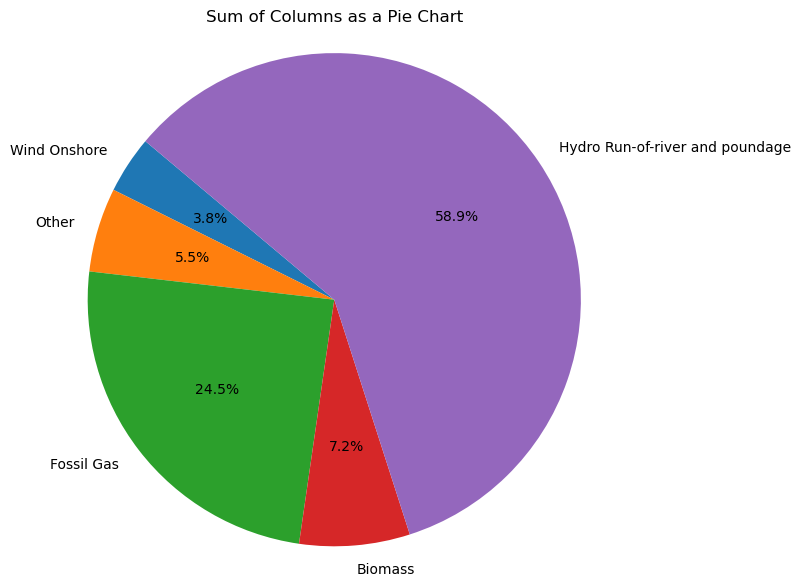

Montenegro
                        type      total  percentage
0  Fossil Brown coal/Lignite  1434988.0        48.0
1      Hydro Water Reservoir  1241072.0        41.0
2               Wind Onshore   321621.0        11.0
3            Other renewable        0.0         0.0


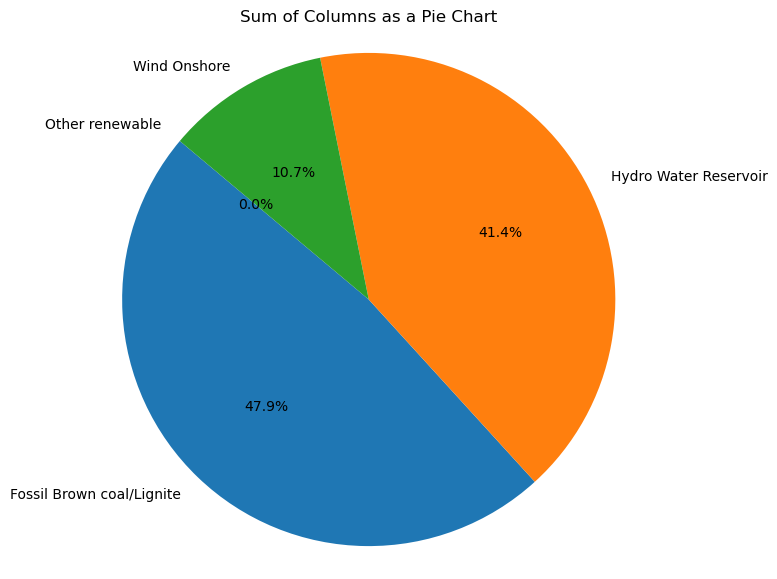

Netherlands
                              type        total  percentage
9                       Fossil Gas  36214160.75        36.0
7                            Other  23180192.75        23.0
5                 Fossil Hard coal  19251213.00        19.0
2                    Wind Offshore   7856873.50         8.0
6                     Wind Onshore   5988701.00         6.0
8                          Nuclear   3907883.00         4.0
0                            Waste   3341549.75         3.0
1                            Solar    422767.00         0.0
3                          Biomass    156852.50         0.0
4  Hydro Run-of-river and poundage         0.00         0.0


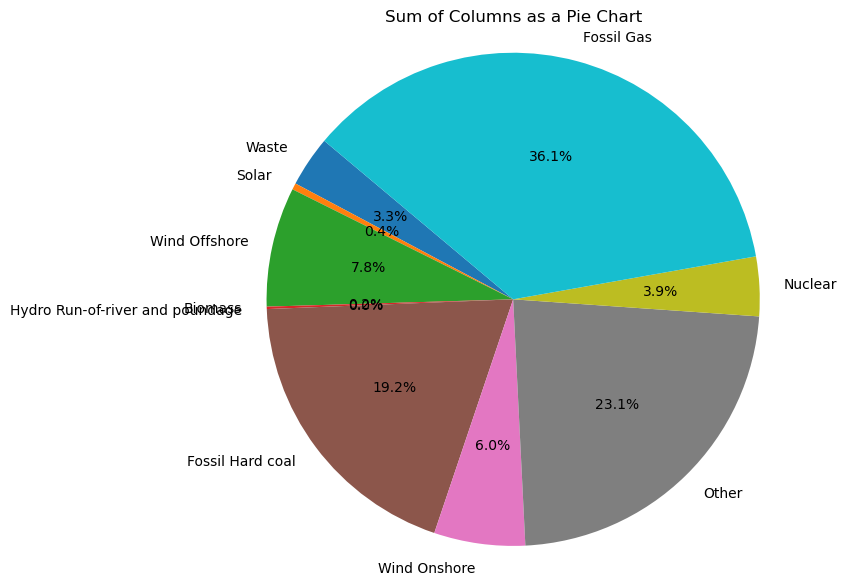

Norway
                              type        total  percentage
1            Hydro Water Reservoir  102267510.0        71.0
5  Hydro Run-of-river and poundage   24173043.0        17.0
6                     Wind Onshore   14677144.0        10.0
3             Hydro Pumped Storage    1544592.0         1.0
8                       Fossil Gas    1241180.0         1.0
2                  Other renewable     396482.0         0.0
0                            Waste     242828.0         0.0
4                          Biomass          0.0         0.0
7                            Other          0.0         0.0


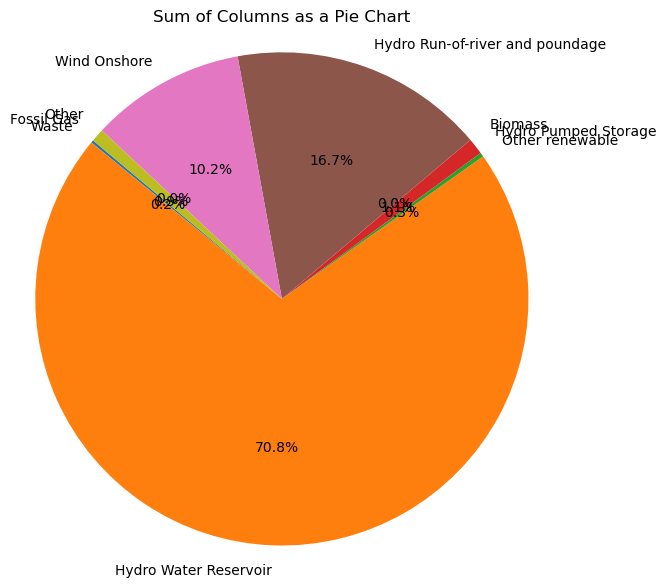

Poland
                               type       total  percentage
6                  Fossil Hard coal  75439710.0        47.0
7         Fossil Brown coal/Lignite  42597924.0        26.0
8                      Wind Onshore  18506738.0        11.0
0                             Solar   9270664.0         6.0
9                        Fossil Gas   9014487.0         6.0
3                        Fossil Oil   2191472.0         1.0
4                           Biomass   1601503.0         1.0
5   Hydro Run-of-river and poundage   1444566.0         1.0
2              Hydro Pumped Storage   1254726.0         1.0
10          Fossil Coal-derived gas    491027.0         0.0
1             Hydro Water Reservoir     88812.0         0.0


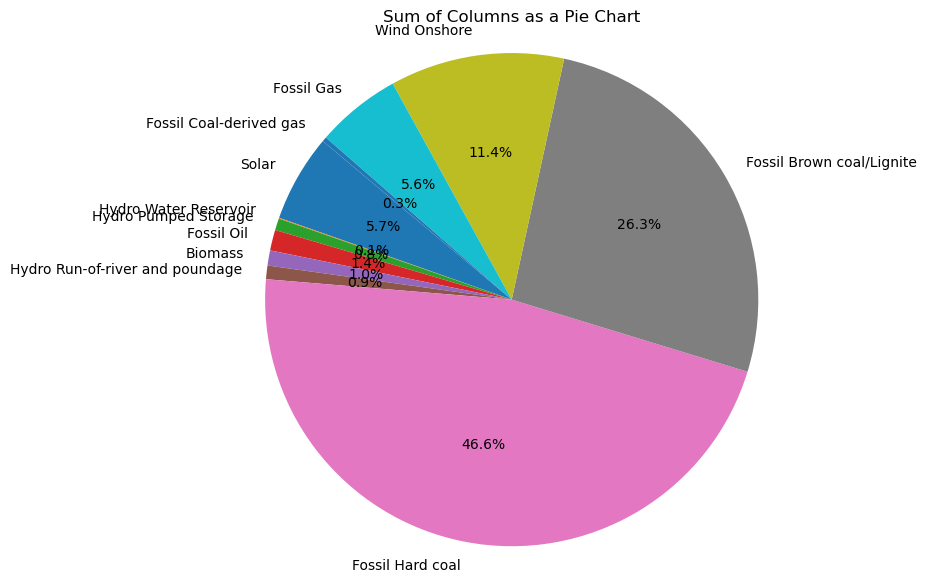

In [4]:
showPieChartsforAllCountries("2022-01-01","2022-12-30")

## Comparing actual energy data with forecast data 
---


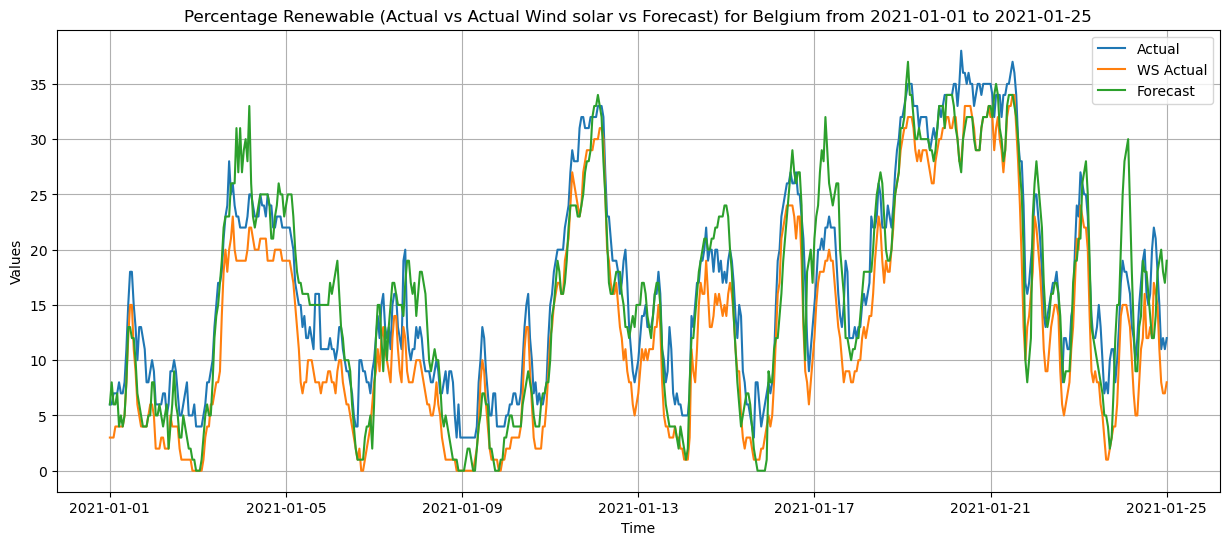

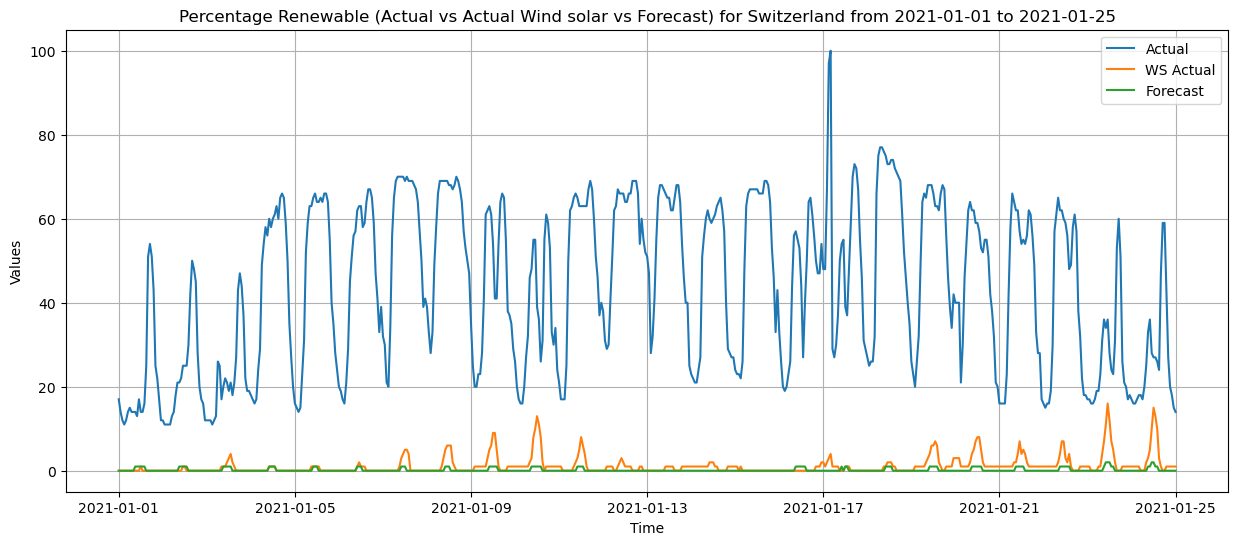

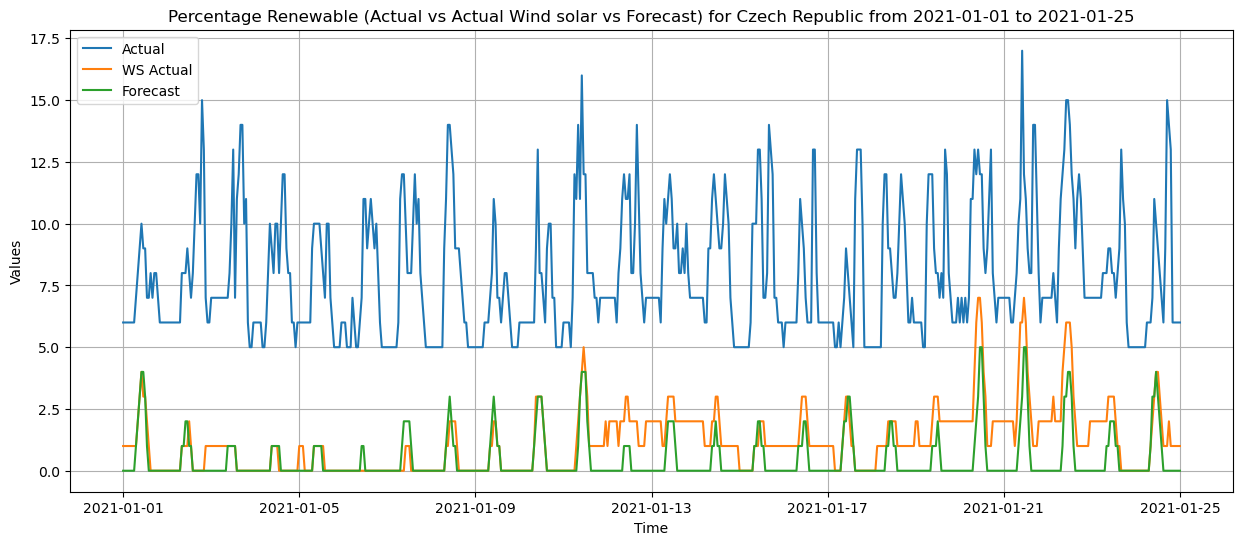

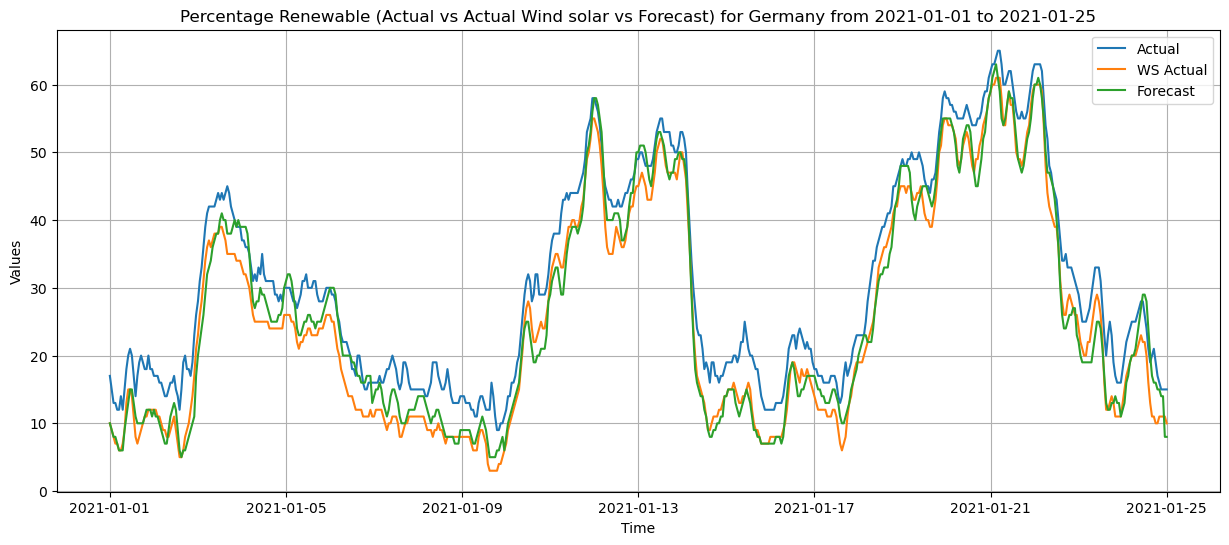

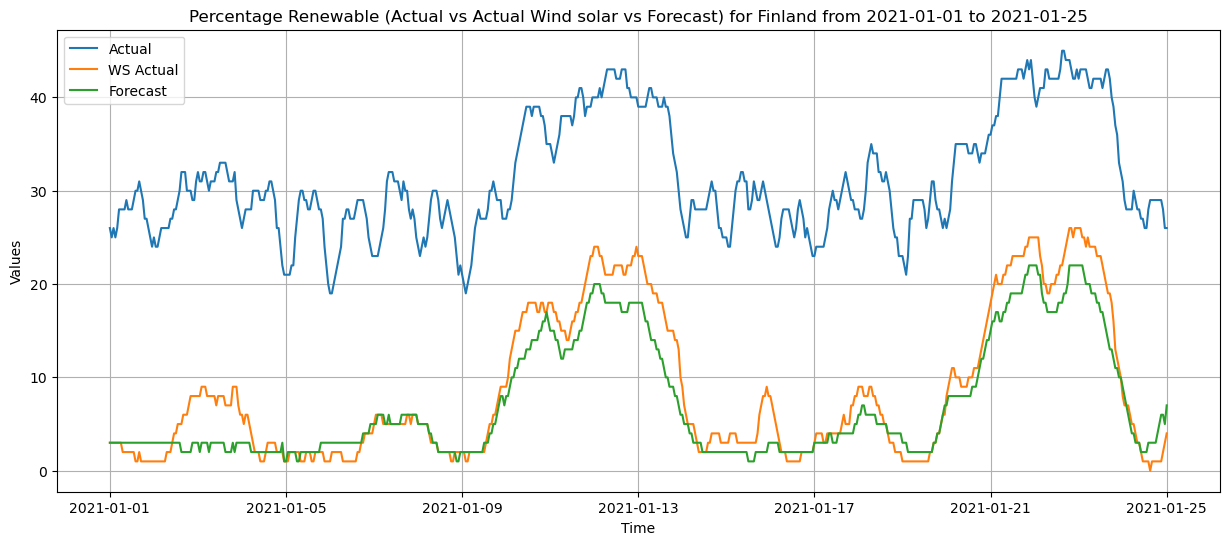

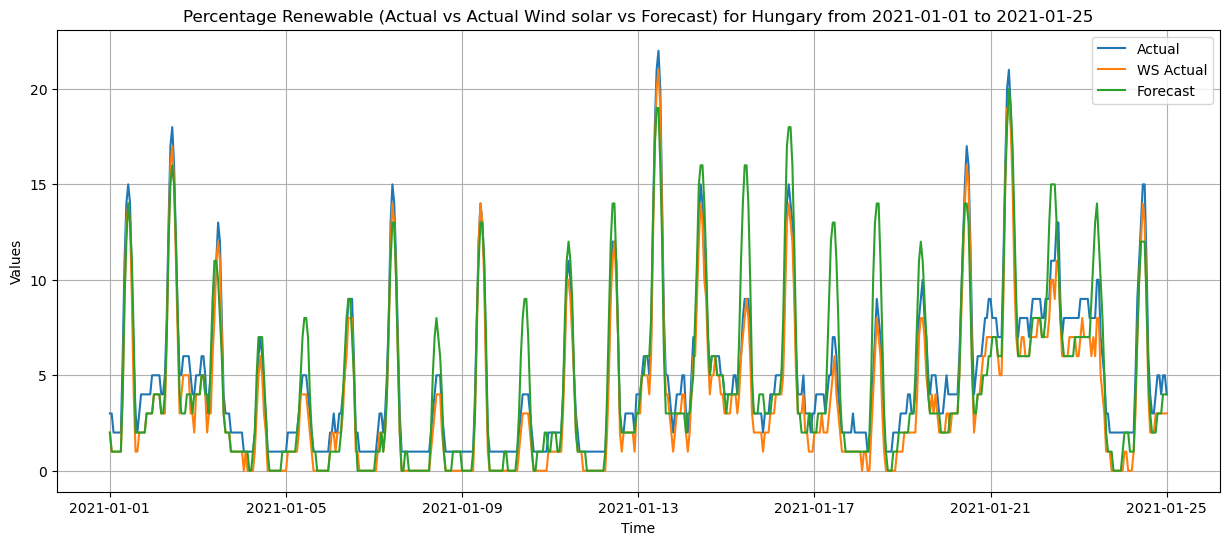

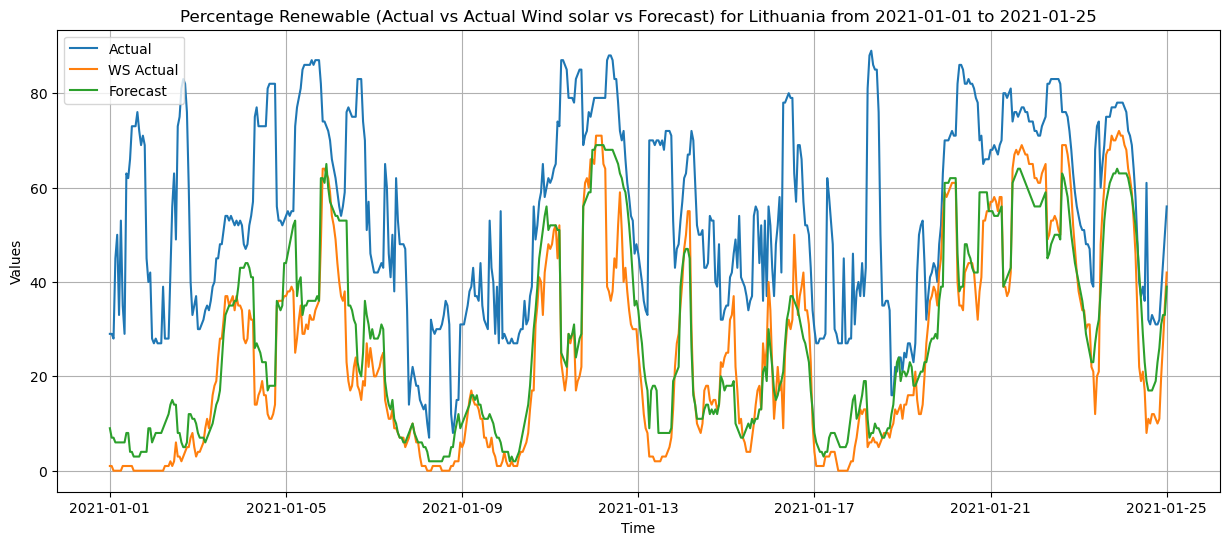

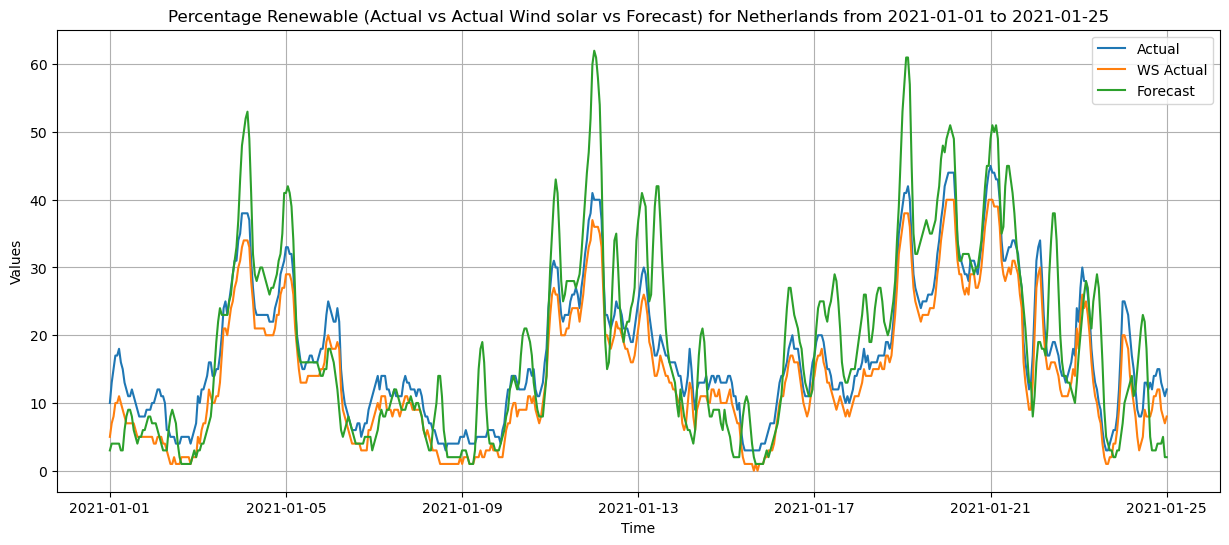

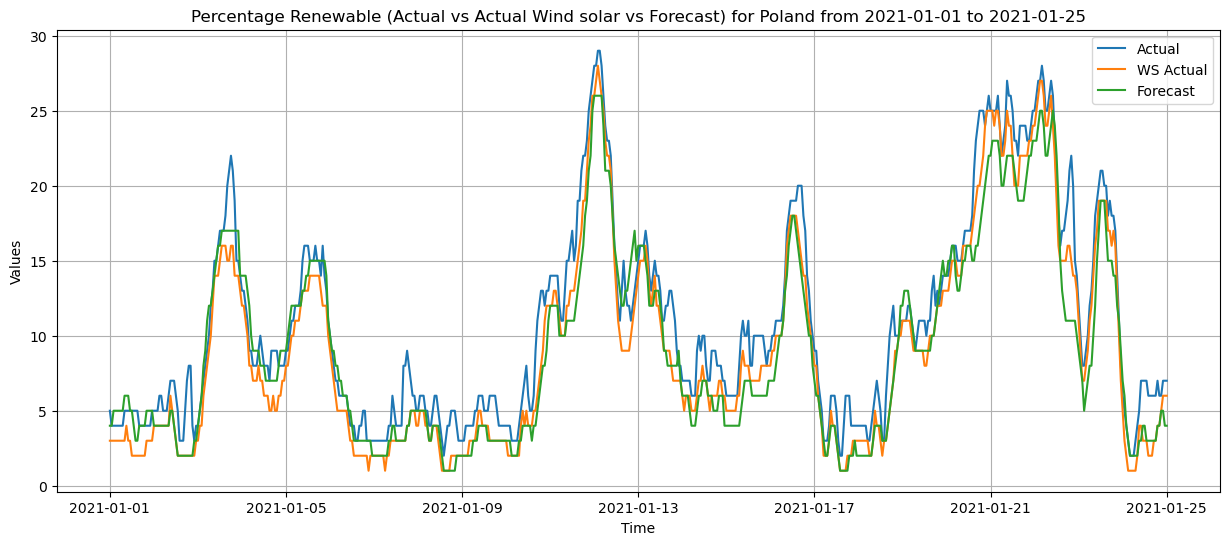

In [135]:
def getActualAndForecastData(code,start,end):
    at = getCountryData(code,"actual",start,end)
    fo = getCountryData(code,"forecast",start,end)
    newData = pd.DataFrame()
    newData["startTime"]=  at["startTime"]
    newData["Actual"] = at["percentRenewable"]
    newData["WS Actual"] = at["percentRenewableWS"]
    newData["Forecast"] = fo["percentRenewable"]
    return newData

def plotActualForecastPercentages(data,code,start,end):
    plot_multiple_line_charts(data, "Percentage Renewable (Actual vs Actual Wind solar vs Forecast) for "+countryName(code)+' from '+start+' to '+end , ["Actual","WS Actual","Forecast"])
    
def showActualForecastPlotsforAllCountries(start,end):
    clist = getCountryList()
    for c in clist :
        data = getActualAndForecastData(c,start,end)
        plotActualForecastPercentages(data,c,start,end)
        
showActualForecastPlotsforAllCountries("2021-01-01","2021-01-25")